### Imagenet

Largest image classification dataset at this point of time.

Url: http://image-net.org/

Our setup: classify from a set of 1000 classes.

In [1]:
#classes' names are stored here
import pickle
classes = pickle.load(open('classes.pkl','rb'))
print (classes[::100])

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


### Using pre-trained model: inception
Keras has a number of models for which you can use pre-trained weights. The interface is super-straightforward:

In [2]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)#, per_process_gpu_memory_fraction=0.1)
s = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [33]:
import keras
import keras.applications as zoo

In [3]:
model = zoo.InceptionV3(include_top=True, weights='imagenet')

Using TensorFlow backend.


In [4]:
# model.summary()

### Predict class probabilities

In [5]:
import matplotlib.pyplot as plt
from scipy.misc import imresize
%matplotlib inline

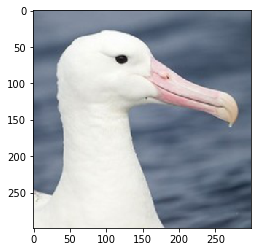

top-10 classes are:
0.9254	albatross
0.0017	turnstile
0.0008	drake
0.0005	collie
0.0005	Shetland sheepdog
0.0004	hammerhead
0.0004	nipple
0.0004	cello
0.0004	Polaroid camera


In [6]:
img = imresize(plt.imread('sample_images/albatross.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

### Having fun with pre-trained nets

In [7]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg

--2017-10-15 17:00:05--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do (cdn.com.do)... 104.25.144.118, 104.25.143.118, 2400:cb00:2048:1::6819:9076, ...
Connecting to cdn.com.do (cdn.com.do)|104.25.144.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49327 (48K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  48.17K  --.-KB/s    in 0.03s   

2017-10-15 17:00:06 (1.63 MB/s) - ‘img.jpg’ saved [49327/49327]



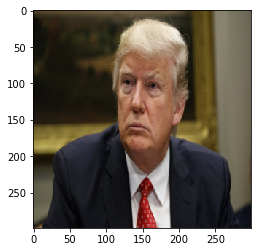

top-10 classes are:
0.2098	suit
0.0802	groom
0.0263	Windsor tie
0.0110	wig
0.0107	oboe
0.0096	academic gown
0.0068	bow tie
0.0057	notebook
0.0055	mortarboard


In [8]:
img = imresize(plt.imread('img.jpg'), (299,299))
plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))



### How do you reuse layers

Since model is just a sequence of layers, one can apply it as any other Keras model. Then you can build more layers on top of it, train them and maybe fine-tune "body" weights a bit.

In [9]:
img = keras.layers.Input('float32',[None,299,299,3])

neck = zoo.InceptionV3(include_top=False, weights='imagenet')(img)

hid = keras.layers.GlobalMaxPool2D()(neck)

hid = keras.layers.Dense(512,activation='relu')(hid)

out = keras.layers.Dense(10,activation='softmax')(hid)

#<...> loss, training, etc. 

# Grand-quest: Dogs Vs Cats
* original competition
* https://www.kaggle.com/c/dogs-vs-cats
* 25k JPEG images of various size, 2 classes (guess what)

### Your main objective
* In this seminar your goal is to fine-tune a pre-trained model to distinguish between the two rivaling animals
* The first step is to just reuse some network layer as features

In [33]:
!wget https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1 -O data.zip
!unzip data.zip

Archive:  data.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflating

  inflating: train/cat.10282.jpg     
  inflating: train/cat.10283.jpg     
  inflating: train/cat.10284.jpg     
  inflating: train/cat.10285.jpg     
  inflating: train/cat.10286.jpg     
  inflating: train/cat.10287.jpg     
  inflating: train/cat.10288.jpg     
  inflating: train/cat.10289.jpg     
  inflating: train/cat.1029.jpg      
  inflating: train/cat.10290.jpg     
  inflating: train/cat.10291.jpg     
  inflating: train/cat.10292.jpg     
  inflating: train/cat.10293.jpg     
  inflating: train/cat.10294.jpg     
  inflating: train/cat.10295.jpg     
  inflating: train/cat.10296.jpg     
  inflating: train/cat.10297.jpg     
  inflating: train/cat.10298.jpg     
  inflating: train/cat.10299.jpg     
  inflating: train/cat.103.jpg       
  inflating: train/cat.1030.jpg      
  inflating: train/cat.10300.jpg     
  inflating: train/cat.10301.jpg     
  inflating: train/cat.10302.jpg     
  inflating: train/cat.10303.jpg     
  inflating: train/cat.10304.jpg     
  inflating:

  inflating: train/cat.10494.jpg     
  inflating: train/cat.10495.jpg     
  inflating: train/cat.10496.jpg     
  inflating: train/cat.10497.jpg     
  inflating: train/cat.10498.jpg     
  inflating: train/cat.10499.jpg     
  inflating: train/cat.105.jpg       
  inflating: train/cat.1050.jpg      
  inflating: train/cat.10500.jpg     
  inflating: train/cat.10501.jpg     
  inflating: train/cat.10502.jpg     
  inflating: train/cat.10503.jpg     
  inflating: train/cat.10504.jpg     
  inflating: train/cat.10505.jpg     
  inflating: train/cat.10506.jpg     
  inflating: train/cat.10507.jpg     
  inflating: train/cat.10508.jpg     
  inflating: train/cat.10509.jpg     
  inflating: train/cat.1051.jpg      
  inflating: train/cat.10510.jpg     
  inflating: train/cat.10511.jpg     
  inflating: train/cat.10512.jpg     
  inflating: train/cat.10513.jpg     
  inflating: train/cat.10514.jpg     
  inflating: train/cat.10515.jpg     
  inflating: train/cat.10516.jpg     
  inflating:

  inflating: train/cat.10740.jpg     
  inflating: train/cat.10741.jpg     
  inflating: train/cat.10742.jpg     
  inflating: train/cat.10743.jpg     
  inflating: train/cat.10744.jpg     
  inflating: train/cat.10745.jpg     
  inflating: train/cat.10746.jpg     
  inflating: train/cat.10747.jpg     
  inflating: train/cat.10748.jpg     
  inflating: train/cat.10749.jpg     
  inflating: train/cat.1075.jpg      
  inflating: train/cat.10750.jpg     
  inflating: train/cat.10751.jpg     
  inflating: train/cat.10752.jpg     
  inflating: train/cat.10753.jpg     
  inflating: train/cat.10754.jpg     
  inflating: train/cat.10755.jpg     
  inflating: train/cat.10756.jpg     
  inflating: train/cat.10757.jpg     
  inflating: train/cat.10758.jpg     
  inflating: train/cat.10759.jpg     
  inflating: train/cat.1076.jpg      
  inflating: train/cat.10760.jpg     
  inflating: train/cat.10761.jpg     
  inflating: train/cat.10762.jpg     
  inflating: train/cat.10763.jpg     
  inflating:

  inflating: train/cat.11007.jpg     
  inflating: train/cat.11008.jpg     
  inflating: train/cat.11009.jpg     
  inflating: train/cat.1101.jpg      
  inflating: train/cat.11010.jpg     
  inflating: train/cat.11011.jpg     
  inflating: train/cat.11012.jpg     
  inflating: train/cat.11013.jpg     
  inflating: train/cat.11014.jpg     
  inflating: train/cat.11015.jpg     
  inflating: train/cat.11016.jpg     
  inflating: train/cat.11017.jpg     
  inflating: train/cat.11018.jpg     
  inflating: train/cat.11019.jpg     
  inflating: train/cat.1102.jpg      
  inflating: train/cat.11020.jpg     
  inflating: train/cat.11021.jpg     
  inflating: train/cat.11022.jpg     
  inflating: train/cat.11023.jpg     
  inflating: train/cat.11024.jpg     
  inflating: train/cat.11025.jpg     
  inflating: train/cat.11026.jpg     
  inflating: train/cat.11027.jpg     
  inflating: train/cat.11028.jpg     
  inflating: train/cat.11029.jpg     
  inflating: train/cat.1103.jpg      
  inflating:

  inflating: train/cat.11295.jpg     
  inflating: train/cat.11296.jpg     
  inflating: train/cat.11297.jpg     
  inflating: train/cat.11298.jpg     
  inflating: train/cat.11299.jpg     
  inflating: train/cat.113.jpg       
  inflating: train/cat.1130.jpg      
  inflating: train/cat.11300.jpg     
  inflating: train/cat.11301.jpg     
  inflating: train/cat.11302.jpg     
  inflating: train/cat.11303.jpg     
  inflating: train/cat.11304.jpg     
  inflating: train/cat.11305.jpg     
  inflating: train/cat.11306.jpg     
  inflating: train/cat.11307.jpg     
  inflating: train/cat.11308.jpg     
  inflating: train/cat.11309.jpg     
  inflating: train/cat.1131.jpg      
  inflating: train/cat.11310.jpg     
  inflating: train/cat.11311.jpg     
  inflating: train/cat.11312.jpg     
  inflating: train/cat.11313.jpg     
  inflating: train/cat.11314.jpg     
  inflating: train/cat.11315.jpg     
  inflating: train/cat.11316.jpg     
  inflating: train/cat.11317.jpg     
  inflating:

  inflating: train/cat.11583.jpg     
  inflating: train/cat.11584.jpg     
  inflating: train/cat.11585.jpg     
  inflating: train/cat.11586.jpg     
  inflating: train/cat.11587.jpg     
  inflating: train/cat.11588.jpg     
  inflating: train/cat.11589.jpg     
  inflating: train/cat.1159.jpg      
  inflating: train/cat.11590.jpg     
  inflating: train/cat.11591.jpg     
  inflating: train/cat.11592.jpg     
  inflating: train/cat.11593.jpg     
  inflating: train/cat.11594.jpg     
  inflating: train/cat.11595.jpg     
  inflating: train/cat.11596.jpg     
  inflating: train/cat.11597.jpg     
  inflating: train/cat.11598.jpg     
  inflating: train/cat.11599.jpg     
  inflating: train/cat.116.jpg       
  inflating: train/cat.1160.jpg      
  inflating: train/cat.11600.jpg     
  inflating: train/cat.11601.jpg     
  inflating: train/cat.11602.jpg     
  inflating: train/cat.11603.jpg     
  inflating: train/cat.11604.jpg     
  inflating: train/cat.11605.jpg     
  inflating:

  inflating: train/cat.11854.jpg     
  inflating: train/cat.11855.jpg     
  inflating: train/cat.11856.jpg     
  inflating: train/cat.11857.jpg     
  inflating: train/cat.11858.jpg     
  inflating: train/cat.11859.jpg     
  inflating: train/cat.1186.jpg      
  inflating: train/cat.11860.jpg     
  inflating: train/cat.11861.jpg     
  inflating: train/cat.11862.jpg     
  inflating: train/cat.11863.jpg     
  inflating: train/cat.11864.jpg     
  inflating: train/cat.11865.jpg     
  inflating: train/cat.11866.jpg     
  inflating: train/cat.11867.jpg     
  inflating: train/cat.11868.jpg     
  inflating: train/cat.11869.jpg     
  inflating: train/cat.1187.jpg      
  inflating: train/cat.11870.jpg     
  inflating: train/cat.11871.jpg     
  inflating: train/cat.11872.jpg     
  inflating: train/cat.11873.jpg     
  inflating: train/cat.11874.jpg     
  inflating: train/cat.11875.jpg     
  inflating: train/cat.11876.jpg     
  inflating: train/cat.11877.jpg     
  inflating:

  inflating: train/cat.12132.jpg     
  inflating: train/cat.12133.jpg     
  inflating: train/cat.12134.jpg     
  inflating: train/cat.12135.jpg     
  inflating: train/cat.12136.jpg     
  inflating: train/cat.12137.jpg     
  inflating: train/cat.12138.jpg     
  inflating: train/cat.12139.jpg     
  inflating: train/cat.1214.jpg      
  inflating: train/cat.12140.jpg     
  inflating: train/cat.12141.jpg     
  inflating: train/cat.12142.jpg     
  inflating: train/cat.12143.jpg     
  inflating: train/cat.12144.jpg     
  inflating: train/cat.12145.jpg     
  inflating: train/cat.12146.jpg     
  inflating: train/cat.12147.jpg     
  inflating: train/cat.12148.jpg     
  inflating: train/cat.12149.jpg     
  inflating: train/cat.1215.jpg      
  inflating: train/cat.12150.jpg     
  inflating: train/cat.12151.jpg     
  inflating: train/cat.12152.jpg     
  inflating: train/cat.12153.jpg     
  inflating: train/cat.12154.jpg     
  inflating: train/cat.12155.jpg     
  inflating:

  inflating: train/cat.12414.jpg     
  inflating: train/cat.12415.jpg     
  inflating: train/cat.12416.jpg     
  inflating: train/cat.12417.jpg     
  inflating: train/cat.12418.jpg     
  inflating: train/cat.12419.jpg     
  inflating: train/cat.1242.jpg      
  inflating: train/cat.12420.jpg     
  inflating: train/cat.12421.jpg     
  inflating: train/cat.12422.jpg     
  inflating: train/cat.12423.jpg     
  inflating: train/cat.12424.jpg     
  inflating: train/cat.12425.jpg     
  inflating: train/cat.12426.jpg     
  inflating: train/cat.12427.jpg     
  inflating: train/cat.12428.jpg     
  inflating: train/cat.12429.jpg     
  inflating: train/cat.1243.jpg      
  inflating: train/cat.12430.jpg     
  inflating: train/cat.12431.jpg     
  inflating: train/cat.12432.jpg     
  inflating: train/cat.12433.jpg     
  inflating: train/cat.12434.jpg     
  inflating: train/cat.12435.jpg     
  inflating: train/cat.12436.jpg     
  inflating: train/cat.12437.jpg     
  inflating:

  inflating: train/cat.1446.jpg      
  inflating: train/cat.1447.jpg      
  inflating: train/cat.1448.jpg      
  inflating: train/cat.1449.jpg      
  inflating: train/cat.145.jpg       
  inflating: train/cat.1450.jpg      
  inflating: train/cat.1451.jpg      
  inflating: train/cat.1452.jpg      
  inflating: train/cat.1453.jpg      
  inflating: train/cat.1454.jpg      
  inflating: train/cat.1455.jpg      
  inflating: train/cat.1456.jpg      
  inflating: train/cat.1457.jpg      
  inflating: train/cat.1458.jpg      
  inflating: train/cat.1459.jpg      
  inflating: train/cat.146.jpg       
  inflating: train/cat.1460.jpg      
  inflating: train/cat.1461.jpg      
  inflating: train/cat.1462.jpg      
  inflating: train/cat.1463.jpg      
  inflating: train/cat.1464.jpg      
  inflating: train/cat.1465.jpg      
  inflating: train/cat.1466.jpg      
  inflating: train/cat.1467.jpg      
  inflating: train/cat.1468.jpg      
  inflating: train/cat.1469.jpg      
  inflating:

  inflating: train/cat.1738.jpg      
  inflating: train/cat.1739.jpg      
  inflating: train/cat.174.jpg       
  inflating: train/cat.1740.jpg      
  inflating: train/cat.1741.jpg      
  inflating: train/cat.1742.jpg      
  inflating: train/cat.1743.jpg      
  inflating: train/cat.1744.jpg      
  inflating: train/cat.1745.jpg      
  inflating: train/cat.1746.jpg      
  inflating: train/cat.1747.jpg      
  inflating: train/cat.1748.jpg      
  inflating: train/cat.1749.jpg      
  inflating: train/cat.175.jpg       
  inflating: train/cat.1750.jpg      
  inflating: train/cat.1751.jpg      
  inflating: train/cat.1752.jpg      
  inflating: train/cat.1753.jpg      
  inflating: train/cat.1754.jpg      
  inflating: train/cat.1755.jpg      
  inflating: train/cat.1756.jpg      
  inflating: train/cat.1757.jpg      
  inflating: train/cat.1758.jpg      
  inflating: train/cat.1759.jpg      
  inflating: train/cat.176.jpg       
  inflating: train/cat.1760.jpg      
  inflating:

  inflating: train/cat.2018.jpg      
  inflating: train/cat.2019.jpg      
  inflating: train/cat.202.jpg       
  inflating: train/cat.2020.jpg      
  inflating: train/cat.2021.jpg      
  inflating: train/cat.2022.jpg      
  inflating: train/cat.2023.jpg      
  inflating: train/cat.2024.jpg      
  inflating: train/cat.2025.jpg      
  inflating: train/cat.2026.jpg      
  inflating: train/cat.2027.jpg      
  inflating: train/cat.2028.jpg      
  inflating: train/cat.2029.jpg      
  inflating: train/cat.203.jpg       
  inflating: train/cat.2030.jpg      
  inflating: train/cat.2031.jpg      
  inflating: train/cat.2032.jpg      
  inflating: train/cat.2033.jpg      
  inflating: train/cat.2034.jpg      
  inflating: train/cat.2035.jpg      
  inflating: train/cat.2036.jpg      
  inflating: train/cat.2037.jpg      
  inflating: train/cat.2038.jpg      
  inflating: train/cat.2039.jpg      
  inflating: train/cat.204.jpg       
  inflating: train/cat.2040.jpg      
  inflating:

  inflating: train/cat.230.jpg       
  inflating: train/cat.2300.jpg      
  inflating: train/cat.2301.jpg      
  inflating: train/cat.2302.jpg      
  inflating: train/cat.2303.jpg      
  inflating: train/cat.2304.jpg      
  inflating: train/cat.2305.jpg      
  inflating: train/cat.2306.jpg      
  inflating: train/cat.2307.jpg      
  inflating: train/cat.2308.jpg      
  inflating: train/cat.2309.jpg      
  inflating: train/cat.231.jpg       
  inflating: train/cat.2310.jpg      
  inflating: train/cat.2311.jpg      
  inflating: train/cat.2312.jpg      
  inflating: train/cat.2313.jpg      
  inflating: train/cat.2314.jpg      
  inflating: train/cat.2315.jpg      
  inflating: train/cat.2316.jpg      
  inflating: train/cat.2317.jpg      
  inflating: train/cat.2318.jpg      
  inflating: train/cat.2319.jpg      
  inflating: train/cat.232.jpg       
  inflating: train/cat.2320.jpg      
  inflating: train/cat.2321.jpg      
  inflating: train/cat.2322.jpg      
  inflating:

  inflating: train/cat.2590.jpg      
  inflating: train/cat.2591.jpg      
  inflating: train/cat.2592.jpg      
  inflating: train/cat.2593.jpg      
  inflating: train/cat.2594.jpg      
  inflating: train/cat.2595.jpg      
  inflating: train/cat.2596.jpg      
  inflating: train/cat.2597.jpg      
  inflating: train/cat.2598.jpg      
  inflating: train/cat.2599.jpg      
  inflating: train/cat.26.jpg        
  inflating: train/cat.260.jpg       
  inflating: train/cat.2600.jpg      
  inflating: train/cat.2601.jpg      
  inflating: train/cat.2602.jpg      
  inflating: train/cat.2603.jpg      
  inflating: train/cat.2604.jpg      
  inflating: train/cat.2605.jpg      
  inflating: train/cat.2606.jpg      
  inflating: train/cat.2607.jpg      
  inflating: train/cat.2608.jpg      
  inflating: train/cat.2609.jpg      
  inflating: train/cat.261.jpg       
  inflating: train/cat.2610.jpg      
  inflating: train/cat.2611.jpg      
  inflating: train/cat.2612.jpg      
  inflating:

  inflating: train/cat.2871.jpg      
  inflating: train/cat.2872.jpg      
  inflating: train/cat.2873.jpg      
  inflating: train/cat.2874.jpg      
  inflating: train/cat.2875.jpg      
  inflating: train/cat.2876.jpg      
  inflating: train/cat.2877.jpg      
  inflating: train/cat.2878.jpg      
  inflating: train/cat.2879.jpg      
  inflating: train/cat.288.jpg       
  inflating: train/cat.2880.jpg      
  inflating: train/cat.2881.jpg      
  inflating: train/cat.2882.jpg      
  inflating: train/cat.2883.jpg      
  inflating: train/cat.2884.jpg      
  inflating: train/cat.2885.jpg      
  inflating: train/cat.2886.jpg      
  inflating: train/cat.2887.jpg      
  inflating: train/cat.2888.jpg      
  inflating: train/cat.2889.jpg      
  inflating: train/cat.289.jpg       
  inflating: train/cat.2890.jpg      
  inflating: train/cat.2891.jpg      
  inflating: train/cat.2892.jpg      
  inflating: train/cat.2893.jpg      
  inflating: train/cat.2894.jpg      
  inflating:

  inflating: train/cat.314.jpg       
  inflating: train/cat.3140.jpg      
  inflating: train/cat.3141.jpg      
  inflating: train/cat.3142.jpg      
  inflating: train/cat.3143.jpg      
  inflating: train/cat.3144.jpg      
  inflating: train/cat.3145.jpg      
  inflating: train/cat.3146.jpg      
  inflating: train/cat.3147.jpg      
  inflating: train/cat.3148.jpg      
  inflating: train/cat.3149.jpg      
  inflating: train/cat.315.jpg       
  inflating: train/cat.3150.jpg      
  inflating: train/cat.3151.jpg      
  inflating: train/cat.3152.jpg      
  inflating: train/cat.3153.jpg      
  inflating: train/cat.3154.jpg      
  inflating: train/cat.3155.jpg      
  inflating: train/cat.3156.jpg      
  inflating: train/cat.3157.jpg      
  inflating: train/cat.3158.jpg      
  inflating: train/cat.3159.jpg      
  inflating: train/cat.316.jpg       
  inflating: train/cat.3160.jpg      
  inflating: train/cat.3161.jpg      
  inflating: train/cat.3162.jpg      
  inflating:

  inflating: train/cat.3427.jpg      
  inflating: train/cat.3428.jpg      
  inflating: train/cat.3429.jpg      
  inflating: train/cat.343.jpg       
  inflating: train/cat.3430.jpg      
  inflating: train/cat.3431.jpg      
  inflating: train/cat.3432.jpg      
  inflating: train/cat.3433.jpg      
  inflating: train/cat.3434.jpg      
  inflating: train/cat.3435.jpg      
  inflating: train/cat.3436.jpg      
  inflating: train/cat.3437.jpg      
  inflating: train/cat.3438.jpg      
  inflating: train/cat.3439.jpg      
  inflating: train/cat.344.jpg       
  inflating: train/cat.3440.jpg      
  inflating: train/cat.3441.jpg      
  inflating: train/cat.3442.jpg      
  inflating: train/cat.3443.jpg      
  inflating: train/cat.3444.jpg      
  inflating: train/cat.3445.jpg      
  inflating: train/cat.3446.jpg      
  inflating: train/cat.3447.jpg      
  inflating: train/cat.3448.jpg      
  inflating: train/cat.3449.jpg      
  inflating: train/cat.345.jpg       
  inflating:

  inflating: train/cat.3703.jpg      
  inflating: train/cat.3704.jpg      
  inflating: train/cat.3705.jpg      
  inflating: train/cat.3706.jpg      
  inflating: train/cat.3707.jpg      
  inflating: train/cat.3708.jpg      
  inflating: train/cat.3709.jpg      
  inflating: train/cat.371.jpg       
  inflating: train/cat.3710.jpg      
  inflating: train/cat.3711.jpg      
  inflating: train/cat.3712.jpg      
  inflating: train/cat.3713.jpg      
  inflating: train/cat.3714.jpg      
  inflating: train/cat.3715.jpg      
  inflating: train/cat.3716.jpg      
  inflating: train/cat.3717.jpg      
  inflating: train/cat.3718.jpg      
  inflating: train/cat.3719.jpg      
  inflating: train/cat.372.jpg       
  inflating: train/cat.3720.jpg      
  inflating: train/cat.3721.jpg      
  inflating: train/cat.3722.jpg      
  inflating: train/cat.3723.jpg      
  inflating: train/cat.3724.jpg      
  inflating: train/cat.3725.jpg      
  inflating: train/cat.3726.jpg      
  inflating:

  inflating: train/cat.3999.jpg      
  inflating: train/cat.4.jpg         
  inflating: train/cat.40.jpg        
  inflating: train/cat.400.jpg       
  inflating: train/cat.4000.jpg      
  inflating: train/cat.4001.jpg      
  inflating: train/cat.4002.jpg      
  inflating: train/cat.4003.jpg      
  inflating: train/cat.4004.jpg      
  inflating: train/cat.4005.jpg      
  inflating: train/cat.4006.jpg      
  inflating: train/cat.4007.jpg      
  inflating: train/cat.4008.jpg      
  inflating: train/cat.4009.jpg      
  inflating: train/cat.401.jpg       
  inflating: train/cat.4010.jpg      
  inflating: train/cat.4011.jpg      
  inflating: train/cat.4012.jpg      
  inflating: train/cat.4013.jpg      
  inflating: train/cat.4014.jpg      
  inflating: train/cat.4015.jpg      
  inflating: train/cat.4016.jpg      
  inflating: train/cat.4017.jpg      
  inflating: train/cat.4018.jpg      
  inflating: train/cat.4019.jpg      
  inflating: train/cat.402.jpg       
  inflating:

  inflating: train/cat.4285.jpg      
  inflating: train/cat.4286.jpg      
  inflating: train/cat.4287.jpg      
  inflating: train/cat.4288.jpg      
  inflating: train/cat.4289.jpg      
  inflating: train/cat.429.jpg       
  inflating: train/cat.4290.jpg      
  inflating: train/cat.4291.jpg      
  inflating: train/cat.4292.jpg      
  inflating: train/cat.4293.jpg      
  inflating: train/cat.4294.jpg      
  inflating: train/cat.4295.jpg      
  inflating: train/cat.4296.jpg      
  inflating: train/cat.4297.jpg      
  inflating: train/cat.4298.jpg      
  inflating: train/cat.4299.jpg      
  inflating: train/cat.43.jpg        
  inflating: train/cat.430.jpg       
  inflating: train/cat.4300.jpg      
  inflating: train/cat.4301.jpg      
  inflating: train/cat.4302.jpg      
  inflating: train/cat.4303.jpg      
  inflating: train/cat.4304.jpg      
  inflating: train/cat.4305.jpg      
  inflating: train/cat.4306.jpg      
  inflating: train/cat.4307.jpg      
  inflating:

  inflating: train/cat.4577.jpg      
  inflating: train/cat.4578.jpg      
  inflating: train/cat.4579.jpg      
  inflating: train/cat.458.jpg       
  inflating: train/cat.4580.jpg      
  inflating: train/cat.4581.jpg      
  inflating: train/cat.4582.jpg      
  inflating: train/cat.4583.jpg      
  inflating: train/cat.4584.jpg      
  inflating: train/cat.4585.jpg      
  inflating: train/cat.4586.jpg      
  inflating: train/cat.4587.jpg      
  inflating: train/cat.4588.jpg      
  inflating: train/cat.4589.jpg      
  inflating: train/cat.459.jpg       
  inflating: train/cat.4590.jpg      
  inflating: train/cat.4591.jpg      
  inflating: train/cat.4592.jpg      
  inflating: train/cat.4593.jpg      
  inflating: train/cat.4594.jpg      
  inflating: train/cat.4595.jpg      
  inflating: train/cat.4596.jpg      
  inflating: train/cat.4597.jpg      
  inflating: train/cat.4598.jpg      
  inflating: train/cat.4599.jpg      
  inflating: train/cat.46.jpg        
  inflating:

  inflating: train/cat.4877.jpg      
  inflating: train/cat.4878.jpg      
  inflating: train/cat.4879.jpg      
  inflating: train/cat.488.jpg       
  inflating: train/cat.4880.jpg      
  inflating: train/cat.4881.jpg      
  inflating: train/cat.4882.jpg      
  inflating: train/cat.4883.jpg      
  inflating: train/cat.4884.jpg      
  inflating: train/cat.4885.jpg      
  inflating: train/cat.4886.jpg      
  inflating: train/cat.4887.jpg      
  inflating: train/cat.4888.jpg      
  inflating: train/cat.4889.jpg      
  inflating: train/cat.489.jpg       
  inflating: train/cat.4890.jpg      
  inflating: train/cat.4891.jpg      
  inflating: train/cat.4892.jpg      
  inflating: train/cat.4893.jpg      
  inflating: train/cat.4894.jpg      
  inflating: train/cat.4895.jpg      
  inflating: train/cat.4896.jpg      
  inflating: train/cat.4897.jpg      
  inflating: train/cat.4898.jpg      
  inflating: train/cat.4899.jpg      
  inflating: train/cat.49.jpg        
  inflating:

  inflating: train/cat.5163.jpg      
  inflating: train/cat.5164.jpg      
  inflating: train/cat.5165.jpg      
  inflating: train/cat.5166.jpg      
  inflating: train/cat.5167.jpg      
  inflating: train/cat.5168.jpg      
  inflating: train/cat.5169.jpg      
  inflating: train/cat.517.jpg       
  inflating: train/cat.5170.jpg      
  inflating: train/cat.5171.jpg      
  inflating: train/cat.5172.jpg      
  inflating: train/cat.5173.jpg      
  inflating: train/cat.5174.jpg      
  inflating: train/cat.5175.jpg      
  inflating: train/cat.5176.jpg      
  inflating: train/cat.5177.jpg      
  inflating: train/cat.5178.jpg      
  inflating: train/cat.5179.jpg      
  inflating: train/cat.518.jpg       
  inflating: train/cat.5180.jpg      
  inflating: train/cat.5181.jpg      
  inflating: train/cat.5182.jpg      
  inflating: train/cat.5183.jpg      
  inflating: train/cat.5184.jpg      
  inflating: train/cat.5185.jpg      
  inflating: train/cat.5186.jpg      
  inflating:

  inflating: train/cat.545.jpg       
  inflating: train/cat.5450.jpg      
  inflating: train/cat.5451.jpg      
  inflating: train/cat.5452.jpg      
  inflating: train/cat.5453.jpg      
  inflating: train/cat.5454.jpg      
  inflating: train/cat.5455.jpg      
  inflating: train/cat.5456.jpg      
  inflating: train/cat.5457.jpg      
  inflating: train/cat.5458.jpg      
  inflating: train/cat.5459.jpg      
  inflating: train/cat.546.jpg       
  inflating: train/cat.5460.jpg      
  inflating: train/cat.5461.jpg      
  inflating: train/cat.5462.jpg      
  inflating: train/cat.5463.jpg      
  inflating: train/cat.5464.jpg      
  inflating: train/cat.5465.jpg      
  inflating: train/cat.5466.jpg      
  inflating: train/cat.5467.jpg      
  inflating: train/cat.5468.jpg      
  inflating: train/cat.5469.jpg      
  inflating: train/cat.547.jpg       
  inflating: train/cat.5470.jpg      
  inflating: train/cat.5471.jpg      
  inflating: train/cat.5472.jpg      
  inflating:

  inflating: train/cat.5738.jpg      
  inflating: train/cat.5739.jpg      
  inflating: train/cat.574.jpg       
  inflating: train/cat.5740.jpg      
  inflating: train/cat.5741.jpg      
  inflating: train/cat.5742.jpg      
  inflating: train/cat.5743.jpg      
  inflating: train/cat.5744.jpg      
  inflating: train/cat.5745.jpg      
  inflating: train/cat.5746.jpg      
  inflating: train/cat.5747.jpg      
  inflating: train/cat.5748.jpg      
  inflating: train/cat.5749.jpg      
  inflating: train/cat.575.jpg       
  inflating: train/cat.5750.jpg      
  inflating: train/cat.5751.jpg      
  inflating: train/cat.5752.jpg      
  inflating: train/cat.5753.jpg      
  inflating: train/cat.5754.jpg      
  inflating: train/cat.5755.jpg      
  inflating: train/cat.5756.jpg      
  inflating: train/cat.5757.jpg      
  inflating: train/cat.5758.jpg      
  inflating: train/cat.5759.jpg      
  inflating: train/cat.576.jpg       
  inflating: train/cat.5760.jpg      
  inflating:

  inflating: train/cat.603.jpg       
  inflating: train/cat.6030.jpg      
  inflating: train/cat.6031.jpg      
  inflating: train/cat.6032.jpg      
  inflating: train/cat.6033.jpg      
  inflating: train/cat.6034.jpg      
  inflating: train/cat.6035.jpg      
  inflating: train/cat.6036.jpg      
  inflating: train/cat.6037.jpg      
  inflating: train/cat.6038.jpg      
  inflating: train/cat.6039.jpg      
  inflating: train/cat.604.jpg       
  inflating: train/cat.6040.jpg      
  inflating: train/cat.6041.jpg      
  inflating: train/cat.6042.jpg      
  inflating: train/cat.6043.jpg      
  inflating: train/cat.6044.jpg      
  inflating: train/cat.6045.jpg      
  inflating: train/cat.6046.jpg      
  inflating: train/cat.6047.jpg      
  inflating: train/cat.6048.jpg      
  inflating: train/cat.6049.jpg      
  inflating: train/cat.605.jpg       
  inflating: train/cat.6050.jpg      
  inflating: train/cat.6051.jpg      
  inflating: train/cat.6052.jpg      
  inflating:

  inflating: train/cat.6310.jpg      
  inflating: train/cat.6311.jpg      
  inflating: train/cat.6312.jpg      
  inflating: train/cat.6313.jpg      
  inflating: train/cat.6314.jpg      
  inflating: train/cat.6315.jpg      
  inflating: train/cat.6316.jpg      
  inflating: train/cat.6317.jpg      
  inflating: train/cat.6318.jpg      
  inflating: train/cat.6319.jpg      
  inflating: train/cat.632.jpg       
  inflating: train/cat.6320.jpg      
  inflating: train/cat.6321.jpg      
  inflating: train/cat.6322.jpg      
  inflating: train/cat.6323.jpg      
  inflating: train/cat.6324.jpg      
  inflating: train/cat.6325.jpg      
  inflating: train/cat.6326.jpg      
  inflating: train/cat.6327.jpg      
  inflating: train/cat.6328.jpg      
  inflating: train/cat.6329.jpg      
  inflating: train/cat.633.jpg       
  inflating: train/cat.6330.jpg      
  inflating: train/cat.6331.jpg      
  inflating: train/cat.6332.jpg      
  inflating: train/cat.6333.jpg      
  inflating:

  inflating: train/cat.66.jpg        
  inflating: train/cat.660.jpg       
  inflating: train/cat.6600.jpg      
  inflating: train/cat.6601.jpg      
  inflating: train/cat.6602.jpg      
  inflating: train/cat.6603.jpg      
  inflating: train/cat.6604.jpg      
  inflating: train/cat.6605.jpg      
  inflating: train/cat.6606.jpg      
  inflating: train/cat.6607.jpg      
  inflating: train/cat.6608.jpg      
  inflating: train/cat.6609.jpg      
  inflating: train/cat.661.jpg       
  inflating: train/cat.6610.jpg      
  inflating: train/cat.6611.jpg      
  inflating: train/cat.6612.jpg      
  inflating: train/cat.6613.jpg      
  inflating: train/cat.6614.jpg      
  inflating: train/cat.6615.jpg      
  inflating: train/cat.6616.jpg      
  inflating: train/cat.6617.jpg      
  inflating: train/cat.6618.jpg      
  inflating: train/cat.6619.jpg      
  inflating: train/cat.662.jpg       
  inflating: train/cat.6620.jpg      
  inflating: train/cat.6621.jpg      
  inflating:

  inflating: train/cat.6893.jpg      
  inflating: train/cat.6894.jpg      
  inflating: train/cat.6895.jpg      
  inflating: train/cat.6896.jpg      
  inflating: train/cat.6897.jpg      
  inflating: train/cat.6898.jpg      
  inflating: train/cat.6899.jpg      
  inflating: train/cat.69.jpg        
  inflating: train/cat.690.jpg       
  inflating: train/cat.6900.jpg      
  inflating: train/cat.6901.jpg      
  inflating: train/cat.6902.jpg      
  inflating: train/cat.6903.jpg      
  inflating: train/cat.6904.jpg      
  inflating: train/cat.6905.jpg      
  inflating: train/cat.6906.jpg      
  inflating: train/cat.6907.jpg      
  inflating: train/cat.6908.jpg      
  inflating: train/cat.6909.jpg      
  inflating: train/cat.691.jpg       
  inflating: train/cat.6910.jpg      
  inflating: train/cat.6911.jpg      
  inflating: train/cat.6912.jpg      
  inflating: train/cat.6913.jpg      
  inflating: train/cat.6914.jpg      
  inflating: train/cat.6915.jpg      
  inflating:

  inflating: train/cat.718.jpg       
  inflating: train/cat.7180.jpg      
  inflating: train/cat.7181.jpg      
  inflating: train/cat.7182.jpg      
  inflating: train/cat.7183.jpg      
  inflating: train/cat.7184.jpg      
  inflating: train/cat.7185.jpg      
  inflating: train/cat.7186.jpg      
  inflating: train/cat.7187.jpg      
  inflating: train/cat.7188.jpg      
  inflating: train/cat.7189.jpg      
  inflating: train/cat.719.jpg       
  inflating: train/cat.7190.jpg      
  inflating: train/cat.7191.jpg      
  inflating: train/cat.7192.jpg      
  inflating: train/cat.7193.jpg      
  inflating: train/cat.7194.jpg      
  inflating: train/cat.7195.jpg      
  inflating: train/cat.7196.jpg      
  inflating: train/cat.7197.jpg      
  inflating: train/cat.7198.jpg      
  inflating: train/cat.7199.jpg      
  inflating: train/cat.72.jpg        
  inflating: train/cat.720.jpg       
  inflating: train/cat.7200.jpg      
  inflating: train/cat.7201.jpg      
  inflating:

  inflating: train/cat.7479.jpg      
  inflating: train/cat.748.jpg       
  inflating: train/cat.7480.jpg      
  inflating: train/cat.7481.jpg      
  inflating: train/cat.7482.jpg      
  inflating: train/cat.7483.jpg      
  inflating: train/cat.7484.jpg      
  inflating: train/cat.7485.jpg      
  inflating: train/cat.7486.jpg      
  inflating: train/cat.7487.jpg      
  inflating: train/cat.7488.jpg      
  inflating: train/cat.7489.jpg      
  inflating: train/cat.749.jpg       
  inflating: train/cat.7490.jpg      
  inflating: train/cat.7491.jpg      
  inflating: train/cat.7492.jpg      
  inflating: train/cat.7493.jpg      
  inflating: train/cat.7494.jpg      
  inflating: train/cat.7495.jpg      
  inflating: train/cat.7496.jpg      
  inflating: train/cat.7497.jpg      
  inflating: train/cat.7498.jpg      
  inflating: train/cat.7499.jpg      
  inflating: train/cat.75.jpg        
  inflating: train/cat.750.jpg       
  inflating: train/cat.7500.jpg      
  inflating:

  inflating: train/cat.777.jpg       
  inflating: train/cat.7770.jpg      
  inflating: train/cat.7771.jpg      
  inflating: train/cat.7772.jpg      
  inflating: train/cat.7773.jpg      
  inflating: train/cat.7774.jpg      
  inflating: train/cat.7775.jpg      
  inflating: train/cat.7776.jpg      
  inflating: train/cat.7777.jpg      
  inflating: train/cat.7778.jpg      
  inflating: train/cat.7779.jpg      
  inflating: train/cat.778.jpg       
  inflating: train/cat.7780.jpg      
  inflating: train/cat.7781.jpg      
  inflating: train/cat.7782.jpg      
  inflating: train/cat.7783.jpg      
  inflating: train/cat.7784.jpg      
  inflating: train/cat.7785.jpg      
  inflating: train/cat.7786.jpg      
  inflating: train/cat.7787.jpg      
  inflating: train/cat.7788.jpg      
  inflating: train/cat.7789.jpg      
  inflating: train/cat.779.jpg       
  inflating: train/cat.7790.jpg      
  inflating: train/cat.7791.jpg      
  inflating: train/cat.7792.jpg      
  inflating:

  inflating: train/cat.806.jpg       
  inflating: train/cat.8060.jpg      
  inflating: train/cat.8061.jpg      
  inflating: train/cat.8062.jpg      
  inflating: train/cat.8063.jpg      
  inflating: train/cat.8064.jpg      
  inflating: train/cat.8065.jpg      
  inflating: train/cat.8066.jpg      
  inflating: train/cat.8067.jpg      
  inflating: train/cat.8068.jpg      
  inflating: train/cat.8069.jpg      
  inflating: train/cat.807.jpg       
  inflating: train/cat.8070.jpg      
  inflating: train/cat.8071.jpg      
  inflating: train/cat.8072.jpg      
  inflating: train/cat.8073.jpg      
  inflating: train/cat.8074.jpg      
  inflating: train/cat.8075.jpg      
  inflating: train/cat.8076.jpg      
  inflating: train/cat.8077.jpg      
  inflating: train/cat.8078.jpg      
  inflating: train/cat.8079.jpg      
  inflating: train/cat.808.jpg       
  inflating: train/cat.8080.jpg      
  inflating: train/cat.8081.jpg      
  inflating: train/cat.8082.jpg      
  inflating:

  inflating: train/cat.835.jpg       
  inflating: train/cat.8350.jpg      
  inflating: train/cat.8351.jpg      
  inflating: train/cat.8352.jpg      
  inflating: train/cat.8353.jpg      
  inflating: train/cat.8354.jpg      
  inflating: train/cat.8355.jpg      
  inflating: train/cat.8356.jpg      
  inflating: train/cat.8357.jpg      
  inflating: train/cat.8358.jpg      
  inflating: train/cat.8359.jpg      
  inflating: train/cat.836.jpg       
  inflating: train/cat.8360.jpg      
  inflating: train/cat.8361.jpg      
  inflating: train/cat.8362.jpg      
  inflating: train/cat.8363.jpg      
  inflating: train/cat.8364.jpg      
  inflating: train/cat.8365.jpg      
  inflating: train/cat.8366.jpg      
  inflating: train/cat.8367.jpg      
  inflating: train/cat.8368.jpg      
  inflating: train/cat.8369.jpg      
  inflating: train/cat.837.jpg       
  inflating: train/cat.8370.jpg      
  inflating: train/cat.8371.jpg      
  inflating: train/cat.8372.jpg      
  inflating:

  inflating: train/cat.8644.jpg      
  inflating: train/cat.8645.jpg      
  inflating: train/cat.8646.jpg      
  inflating: train/cat.8647.jpg      
  inflating: train/cat.8648.jpg      
  inflating: train/cat.8649.jpg      
  inflating: train/cat.865.jpg       
  inflating: train/cat.8650.jpg      
  inflating: train/cat.8651.jpg      
  inflating: train/cat.8652.jpg      
  inflating: train/cat.8653.jpg      
  inflating: train/cat.8654.jpg      
  inflating: train/cat.8655.jpg      
  inflating: train/cat.8656.jpg      
  inflating: train/cat.8657.jpg      
  inflating: train/cat.8658.jpg      
  inflating: train/cat.8659.jpg      
  inflating: train/cat.866.jpg       
  inflating: train/cat.8660.jpg      
  inflating: train/cat.8661.jpg      
  inflating: train/cat.8662.jpg      
  inflating: train/cat.8663.jpg      
  inflating: train/cat.8664.jpg      
  inflating: train/cat.8665.jpg      
  inflating: train/cat.8666.jpg      
  inflating: train/cat.8667.jpg      
  inflating:

  inflating: train/cat.8942.jpg      
  inflating: train/cat.8943.jpg      
  inflating: train/cat.8944.jpg      
  inflating: train/cat.8945.jpg      
  inflating: train/cat.8946.jpg      
  inflating: train/cat.8947.jpg      
  inflating: train/cat.8948.jpg      
  inflating: train/cat.8949.jpg      
  inflating: train/cat.895.jpg       
  inflating: train/cat.8950.jpg      
  inflating: train/cat.8951.jpg      
  inflating: train/cat.8952.jpg      
  inflating: train/cat.8953.jpg      
  inflating: train/cat.8954.jpg      
  inflating: train/cat.8955.jpg      
  inflating: train/cat.8956.jpg      
  inflating: train/cat.8957.jpg      
  inflating: train/cat.8958.jpg      
  inflating: train/cat.8959.jpg      
  inflating: train/cat.896.jpg       
  inflating: train/cat.8960.jpg      
  inflating: train/cat.8961.jpg      
  inflating: train/cat.8962.jpg      
  inflating: train/cat.8963.jpg      
  inflating: train/cat.8964.jpg      
  inflating: train/cat.8965.jpg      
  inflating:

  inflating: train/cat.9239.jpg      
  inflating: train/cat.924.jpg       
  inflating: train/cat.9240.jpg      
  inflating: train/cat.9241.jpg      
  inflating: train/cat.9242.jpg      
  inflating: train/cat.9243.jpg      
  inflating: train/cat.9244.jpg      
  inflating: train/cat.9245.jpg      
  inflating: train/cat.9246.jpg      
  inflating: train/cat.9247.jpg      
  inflating: train/cat.9248.jpg      
  inflating: train/cat.9249.jpg      
  inflating: train/cat.925.jpg       
  inflating: train/cat.9250.jpg      
  inflating: train/cat.9251.jpg      
  inflating: train/cat.9252.jpg      
  inflating: train/cat.9253.jpg      
  inflating: train/cat.9254.jpg      
  inflating: train/cat.9255.jpg      
  inflating: train/cat.9256.jpg      
  inflating: train/cat.9257.jpg      
  inflating: train/cat.9258.jpg      
  inflating: train/cat.9259.jpg      
  inflating: train/cat.926.jpg       
  inflating: train/cat.9260.jpg      
  inflating: train/cat.9261.jpg      
  inflating:

  inflating: train/cat.9547.jpg      
  inflating: train/cat.9548.jpg      
  inflating: train/cat.9549.jpg      
  inflating: train/cat.955.jpg       
  inflating: train/cat.9550.jpg      
  inflating: train/cat.9551.jpg      
  inflating: train/cat.9552.jpg      
  inflating: train/cat.9553.jpg      
  inflating: train/cat.9554.jpg      
  inflating: train/cat.9555.jpg      
  inflating: train/cat.9556.jpg      
  inflating: train/cat.9557.jpg      
  inflating: train/cat.9558.jpg      
  inflating: train/cat.9559.jpg      
  inflating: train/cat.956.jpg       
  inflating: train/cat.9560.jpg      
  inflating: train/cat.9561.jpg      
  inflating: train/cat.9562.jpg      
  inflating: train/cat.9563.jpg      
  inflating: train/cat.9564.jpg      
  inflating: train/cat.9565.jpg      
  inflating: train/cat.9566.jpg      
  inflating: train/cat.9567.jpg      
  inflating: train/cat.9568.jpg      
  inflating: train/cat.9569.jpg      
  inflating: train/cat.957.jpg       
  inflating:

  inflating: train/cat.9836.jpg      
  inflating: train/cat.9837.jpg      
  inflating: train/cat.9838.jpg      
  inflating: train/cat.9839.jpg      
  inflating: train/cat.984.jpg       
  inflating: train/cat.9840.jpg      
  inflating: train/cat.9841.jpg      
  inflating: train/cat.9842.jpg      
  inflating: train/cat.9843.jpg      
  inflating: train/cat.9844.jpg      
  inflating: train/cat.9845.jpg      
  inflating: train/cat.9846.jpg      
  inflating: train/cat.9847.jpg      
  inflating: train/cat.9848.jpg      
  inflating: train/cat.9849.jpg      
  inflating: train/cat.985.jpg       
  inflating: train/cat.9850.jpg      
  inflating: train/cat.9851.jpg      
  inflating: train/cat.9852.jpg      
  inflating: train/cat.9853.jpg      
  inflating: train/cat.9854.jpg      
  inflating: train/cat.9855.jpg      
  inflating: train/cat.9856.jpg      
  inflating: train/cat.9857.jpg      
  inflating: train/cat.9858.jpg      
  inflating: train/cat.9859.jpg      
  inflating:

  inflating: train/dog.10104.jpg     
  inflating: train/dog.10105.jpg     
  inflating: train/dog.10106.jpg     
  inflating: train/dog.10107.jpg     
  inflating: train/dog.10108.jpg     
  inflating: train/dog.10109.jpg     
  inflating: train/dog.1011.jpg      
  inflating: train/dog.10110.jpg     
  inflating: train/dog.10111.jpg     
  inflating: train/dog.10112.jpg     
  inflating: train/dog.10113.jpg     
  inflating: train/dog.10114.jpg     
  inflating: train/dog.10115.jpg     
  inflating: train/dog.10116.jpg     
  inflating: train/dog.10117.jpg     
  inflating: train/dog.10118.jpg     
  inflating: train/dog.10119.jpg     
  inflating: train/dog.1012.jpg      
  inflating: train/dog.10120.jpg     
  inflating: train/dog.10121.jpg     
  inflating: train/dog.10122.jpg     
  inflating: train/dog.10123.jpg     
  inflating: train/dog.10124.jpg     
  inflating: train/dog.10125.jpg     
  inflating: train/dog.10126.jpg     
  inflating: train/dog.10127.jpg     
  inflating:

  inflating: train/dog.10365.jpg     
  inflating: train/dog.10366.jpg     
  inflating: train/dog.10367.jpg     
  inflating: train/dog.10368.jpg     
  inflating: train/dog.10369.jpg     
  inflating: train/dog.1037.jpg      
  inflating: train/dog.10370.jpg     
  inflating: train/dog.10371.jpg     
  inflating: train/dog.10372.jpg     
  inflating: train/dog.10373.jpg     
  inflating: train/dog.10374.jpg     
  inflating: train/dog.10375.jpg     
  inflating: train/dog.10376.jpg     
  inflating: train/dog.10377.jpg     
  inflating: train/dog.10378.jpg     
  inflating: train/dog.10379.jpg     
  inflating: train/dog.1038.jpg      
  inflating: train/dog.10380.jpg     
  inflating: train/dog.10381.jpg     
  inflating: train/dog.10382.jpg     
  inflating: train/dog.10383.jpg     
  inflating: train/dog.10384.jpg     
  inflating: train/dog.10385.jpg     
  inflating: train/dog.10386.jpg     
  inflating: train/dog.10387.jpg     
  inflating: train/dog.10388.jpg     
  inflating:

  inflating: train/dog.10623.jpg     
  inflating: train/dog.10624.jpg     
  inflating: train/dog.10625.jpg     
  inflating: train/dog.10626.jpg     
  inflating: train/dog.10627.jpg     
  inflating: train/dog.10628.jpg     
  inflating: train/dog.10629.jpg     
  inflating: train/dog.1063.jpg      
  inflating: train/dog.10630.jpg     
  inflating: train/dog.10631.jpg     
  inflating: train/dog.10632.jpg     
  inflating: train/dog.10633.jpg     
  inflating: train/dog.10634.jpg     
  inflating: train/dog.10635.jpg     
  inflating: train/dog.10636.jpg     
  inflating: train/dog.10637.jpg     
  inflating: train/dog.10638.jpg     
  inflating: train/dog.10639.jpg     
  inflating: train/dog.1064.jpg      
  inflating: train/dog.10640.jpg     
  inflating: train/dog.10641.jpg     
  inflating: train/dog.10642.jpg     
  inflating: train/dog.10643.jpg     
  inflating: train/dog.10644.jpg     
  inflating: train/dog.10645.jpg     
  inflating: train/dog.10646.jpg     
  inflating:

  inflating: train/dog.10882.jpg     
  inflating: train/dog.10883.jpg     
  inflating: train/dog.10884.jpg     
  inflating: train/dog.10885.jpg     
  inflating: train/dog.10886.jpg     
  inflating: train/dog.10887.jpg     
  inflating: train/dog.10888.jpg     
  inflating: train/dog.10889.jpg     
  inflating: train/dog.1089.jpg      
  inflating: train/dog.10890.jpg     
  inflating: train/dog.10891.jpg     
  inflating: train/dog.10892.jpg     
  inflating: train/dog.10893.jpg     
  inflating: train/dog.10894.jpg     
  inflating: train/dog.10895.jpg     
  inflating: train/dog.10896.jpg     
  inflating: train/dog.10897.jpg     
  inflating: train/dog.10898.jpg     
  inflating: train/dog.10899.jpg     
  inflating: train/dog.109.jpg       
  inflating: train/dog.1090.jpg      
  inflating: train/dog.10900.jpg     
  inflating: train/dog.10901.jpg     
  inflating: train/dog.10902.jpg     
  inflating: train/dog.10903.jpg     
  inflating: train/dog.10904.jpg     
  inflating:

  inflating: train/dog.11143.jpg     
  inflating: train/dog.11144.jpg     
  inflating: train/dog.11145.jpg     
  inflating: train/dog.11146.jpg     
  inflating: train/dog.11147.jpg     
  inflating: train/dog.11148.jpg     
  inflating: train/dog.11149.jpg     
  inflating: train/dog.1115.jpg      
  inflating: train/dog.11150.jpg     
  inflating: train/dog.11151.jpg     
  inflating: train/dog.11152.jpg     
  inflating: train/dog.11153.jpg     
  inflating: train/dog.11154.jpg     
  inflating: train/dog.11155.jpg     
  inflating: train/dog.11156.jpg     
  inflating: train/dog.11157.jpg     
  inflating: train/dog.11158.jpg     
  inflating: train/dog.11159.jpg     
  inflating: train/dog.1116.jpg      
  inflating: train/dog.11160.jpg     
  inflating: train/dog.11161.jpg     
  inflating: train/dog.11162.jpg     
  inflating: train/dog.11163.jpg     
  inflating: train/dog.11164.jpg     
  inflating: train/dog.11165.jpg     
  inflating: train/dog.11166.jpg     
  inflating:

  inflating: train/dog.1140.jpg      
  inflating: train/dog.11400.jpg     
  inflating: train/dog.11401.jpg     
  inflating: train/dog.11402.jpg     
  inflating: train/dog.11403.jpg     
  inflating: train/dog.11404.jpg     
  inflating: train/dog.11405.jpg     
  inflating: train/dog.11406.jpg     
  inflating: train/dog.11407.jpg     
  inflating: train/dog.11408.jpg     
  inflating: train/dog.11409.jpg     
  inflating: train/dog.1141.jpg      
  inflating: train/dog.11410.jpg     
  inflating: train/dog.11411.jpg     
  inflating: train/dog.11412.jpg     
  inflating: train/dog.11413.jpg     
  inflating: train/dog.11414.jpg     
  inflating: train/dog.11415.jpg     
  inflating: train/dog.11416.jpg     
  inflating: train/dog.11417.jpg     
  inflating: train/dog.11418.jpg     
  inflating: train/dog.11419.jpg     
  inflating: train/dog.1142.jpg      
  inflating: train/dog.11420.jpg     
  inflating: train/dog.11421.jpg     
  inflating: train/dog.11422.jpg     
  inflating:

  inflating: train/dog.11659.jpg     
  inflating: train/dog.1166.jpg      
  inflating: train/dog.11660.jpg     
  inflating: train/dog.11661.jpg     
  inflating: train/dog.11662.jpg     
  inflating: train/dog.11663.jpg     
  inflating: train/dog.11664.jpg     
  inflating: train/dog.11665.jpg     
  inflating: train/dog.11666.jpg     
  inflating: train/dog.11667.jpg     
  inflating: train/dog.11668.jpg     
  inflating: train/dog.11669.jpg     
  inflating: train/dog.1167.jpg      
  inflating: train/dog.11670.jpg     
  inflating: train/dog.11671.jpg     
  inflating: train/dog.11672.jpg     
  inflating: train/dog.11673.jpg     
  inflating: train/dog.11674.jpg     
  inflating: train/dog.11675.jpg     
  inflating: train/dog.11676.jpg     
  inflating: train/dog.11677.jpg     
  inflating: train/dog.11678.jpg     
  inflating: train/dog.11679.jpg     
  inflating: train/dog.1168.jpg      
  inflating: train/dog.11680.jpg     
  inflating: train/dog.11681.jpg     
  inflating:

  inflating: train/dog.11925.jpg     
  inflating: train/dog.11926.jpg     
  inflating: train/dog.11927.jpg     
  inflating: train/dog.11928.jpg     
  inflating: train/dog.11929.jpg     
  inflating: train/dog.1193.jpg      
  inflating: train/dog.11930.jpg     
  inflating: train/dog.11931.jpg     
  inflating: train/dog.11932.jpg     
  inflating: train/dog.11933.jpg     
  inflating: train/dog.11934.jpg     
  inflating: train/dog.11935.jpg     
  inflating: train/dog.11936.jpg     
  inflating: train/dog.11937.jpg     
  inflating: train/dog.11938.jpg     
  inflating: train/dog.11939.jpg     
  inflating: train/dog.1194.jpg      
  inflating: train/dog.11940.jpg     
  inflating: train/dog.11941.jpg     
  inflating: train/dog.11942.jpg     
  inflating: train/dog.11943.jpg     
  inflating: train/dog.11944.jpg     
  inflating: train/dog.11945.jpg     
  inflating: train/dog.11946.jpg     
  inflating: train/dog.11947.jpg     
  inflating: train/dog.11948.jpg     
  inflating:

  inflating: train/dog.12187.jpg     
  inflating: train/dog.12188.jpg     
  inflating: train/dog.12189.jpg     
  inflating: train/dog.1219.jpg      
  inflating: train/dog.12190.jpg     
  inflating: train/dog.12191.jpg     
  inflating: train/dog.12192.jpg     
  inflating: train/dog.12193.jpg     
  inflating: train/dog.12194.jpg     
  inflating: train/dog.12195.jpg     
  inflating: train/dog.12196.jpg     
  inflating: train/dog.12197.jpg     
  inflating: train/dog.12198.jpg     
  inflating: train/dog.12199.jpg     
  inflating: train/dog.122.jpg       
  inflating: train/dog.1220.jpg      
  inflating: train/dog.12200.jpg     
  inflating: train/dog.12201.jpg     
  inflating: train/dog.12202.jpg     
  inflating: train/dog.12203.jpg     
  inflating: train/dog.12204.jpg     
  inflating: train/dog.12205.jpg     
  inflating: train/dog.12206.jpg     
  inflating: train/dog.12207.jpg     
  inflating: train/dog.12208.jpg     
  inflating: train/dog.12209.jpg     
  inflating:

  inflating: train/dog.12445.jpg     
  inflating: train/dog.12446.jpg     
  inflating: train/dog.12447.jpg     
  inflating: train/dog.12448.jpg     
  inflating: train/dog.12449.jpg     
  inflating: train/dog.1245.jpg      
  inflating: train/dog.12450.jpg     
  inflating: train/dog.12451.jpg     
  inflating: train/dog.12452.jpg     
  inflating: train/dog.12453.jpg     
  inflating: train/dog.12454.jpg     
  inflating: train/dog.12455.jpg     
  inflating: train/dog.12456.jpg     
  inflating: train/dog.12457.jpg     
  inflating: train/dog.12458.jpg     
  inflating: train/dog.12459.jpg     
  inflating: train/dog.1246.jpg      
  inflating: train/dog.12460.jpg     
  inflating: train/dog.12461.jpg     
  inflating: train/dog.12462.jpg     
  inflating: train/dog.12463.jpg     
  inflating: train/dog.12464.jpg     
  inflating: train/dog.12465.jpg     
  inflating: train/dog.12466.jpg     
  inflating: train/dog.12467.jpg     
  inflating: train/dog.12468.jpg     
  inflating:

  inflating: train/dog.1464.jpg      
  inflating: train/dog.1465.jpg      
  inflating: train/dog.1466.jpg      
  inflating: train/dog.1467.jpg      
  inflating: train/dog.1468.jpg      
  inflating: train/dog.1469.jpg      
  inflating: train/dog.147.jpg       
  inflating: train/dog.1470.jpg      
  inflating: train/dog.1471.jpg      
  inflating: train/dog.1472.jpg      
  inflating: train/dog.1473.jpg      
  inflating: train/dog.1474.jpg      
  inflating: train/dog.1475.jpg      
  inflating: train/dog.1476.jpg      
  inflating: train/dog.1477.jpg      
  inflating: train/dog.1478.jpg      
  inflating: train/dog.1479.jpg      
  inflating: train/dog.148.jpg       
  inflating: train/dog.1480.jpg      
  inflating: train/dog.1481.jpg      
  inflating: train/dog.1482.jpg      
  inflating: train/dog.1483.jpg      
  inflating: train/dog.1484.jpg      
  inflating: train/dog.1485.jpg      
  inflating: train/dog.1486.jpg      
  inflating: train/dog.1487.jpg      
  inflating:

  inflating: train/dog.1735.jpg      
  inflating: train/dog.1736.jpg      
  inflating: train/dog.1737.jpg      
  inflating: train/dog.1738.jpg      
  inflating: train/dog.1739.jpg      
  inflating: train/dog.174.jpg       
  inflating: train/dog.1740.jpg      
  inflating: train/dog.1741.jpg      
  inflating: train/dog.1742.jpg      
  inflating: train/dog.1743.jpg      
  inflating: train/dog.1744.jpg      
  inflating: train/dog.1745.jpg      
  inflating: train/dog.1746.jpg      
  inflating: train/dog.1747.jpg      
  inflating: train/dog.1748.jpg      
  inflating: train/dog.1749.jpg      
  inflating: train/dog.175.jpg       
  inflating: train/dog.1750.jpg      
  inflating: train/dog.1751.jpg      
  inflating: train/dog.1752.jpg      
  inflating: train/dog.1753.jpg      
  inflating: train/dog.1754.jpg      
  inflating: train/dog.1755.jpg      
  inflating: train/dog.1756.jpg      
  inflating: train/dog.1757.jpg      
  inflating: train/dog.1758.jpg      
  inflating:

  inflating: train/dog.2009.jpg      
  inflating: train/dog.201.jpg       
  inflating: train/dog.2010.jpg      
  inflating: train/dog.2011.jpg      
  inflating: train/dog.2012.jpg      
  inflating: train/dog.2013.jpg      
  inflating: train/dog.2014.jpg      
  inflating: train/dog.2015.jpg      
  inflating: train/dog.2016.jpg      
  inflating: train/dog.2017.jpg      
  inflating: train/dog.2018.jpg      
  inflating: train/dog.2019.jpg      
  inflating: train/dog.202.jpg       
  inflating: train/dog.2020.jpg      
  inflating: train/dog.2021.jpg      
  inflating: train/dog.2022.jpg      
  inflating: train/dog.2023.jpg      
  inflating: train/dog.2024.jpg      
  inflating: train/dog.2025.jpg      
  inflating: train/dog.2026.jpg      
  inflating: train/dog.2027.jpg      
  inflating: train/dog.2028.jpg      
  inflating: train/dog.2029.jpg      
  inflating: train/dog.203.jpg       
  inflating: train/dog.2030.jpg      
  inflating: train/dog.2031.jpg      
  inflating:

  inflating: train/dog.2263.jpg      
  inflating: train/dog.2264.jpg      
  inflating: train/dog.2265.jpg      
  inflating: train/dog.2266.jpg      
  inflating: train/dog.2267.jpg      
  inflating: train/dog.2268.jpg      
  inflating: train/dog.2269.jpg      
  inflating: train/dog.227.jpg       
  inflating: train/dog.2270.jpg      
  inflating: train/dog.2271.jpg      
  inflating: train/dog.2272.jpg      
  inflating: train/dog.2273.jpg      
  inflating: train/dog.2274.jpg      
  inflating: train/dog.2275.jpg      
  inflating: train/dog.2276.jpg      
  inflating: train/dog.2277.jpg      
  inflating: train/dog.2278.jpg      
  inflating: train/dog.2279.jpg      
  inflating: train/dog.228.jpg       
  inflating: train/dog.2280.jpg      
  inflating: train/dog.2281.jpg      
  inflating: train/dog.2282.jpg      
  inflating: train/dog.2283.jpg      
  inflating: train/dog.2284.jpg      
  inflating: train/dog.2285.jpg      
  inflating: train/dog.2286.jpg      
  inflating:

  inflating: train/dog.2521.jpg      
  inflating: train/dog.2522.jpg      
  inflating: train/dog.2523.jpg      
  inflating: train/dog.2524.jpg      
  inflating: train/dog.2525.jpg      
  inflating: train/dog.2526.jpg      
  inflating: train/dog.2527.jpg      
  inflating: train/dog.2528.jpg      
  inflating: train/dog.2529.jpg      
  inflating: train/dog.253.jpg       
  inflating: train/dog.2530.jpg      
  inflating: train/dog.2531.jpg      
  inflating: train/dog.2532.jpg      
  inflating: train/dog.2533.jpg      
  inflating: train/dog.2534.jpg      
  inflating: train/dog.2535.jpg      
  inflating: train/dog.2536.jpg      
  inflating: train/dog.2537.jpg      
  inflating: train/dog.2538.jpg      
  inflating: train/dog.2539.jpg      
  inflating: train/dog.254.jpg       
  inflating: train/dog.2540.jpg      
  inflating: train/dog.2541.jpg      
  inflating: train/dog.2542.jpg      
  inflating: train/dog.2543.jpg      
  inflating: train/dog.2544.jpg      
  inflating:

  inflating: train/dog.2786.jpg      
  inflating: train/dog.2787.jpg      
  inflating: train/dog.2788.jpg      
  inflating: train/dog.2789.jpg      
  inflating: train/dog.279.jpg       
  inflating: train/dog.2790.jpg      
  inflating: train/dog.2791.jpg      
  inflating: train/dog.2792.jpg      
  inflating: train/dog.2793.jpg      
  inflating: train/dog.2794.jpg      
  inflating: train/dog.2795.jpg      
  inflating: train/dog.2796.jpg      
  inflating: train/dog.2797.jpg      
  inflating: train/dog.2798.jpg      
  inflating: train/dog.2799.jpg      
  inflating: train/dog.28.jpg        
  inflating: train/dog.280.jpg       
  inflating: train/dog.2800.jpg      
  inflating: train/dog.2801.jpg      
  inflating: train/dog.2802.jpg      
  inflating: train/dog.2803.jpg      
  inflating: train/dog.2804.jpg      
  inflating: train/dog.2805.jpg      
  inflating: train/dog.2806.jpg      
  inflating: train/dog.2807.jpg      
  inflating: train/dog.2808.jpg      
  inflating:

  inflating: train/dog.3056.jpg      
  inflating: train/dog.3057.jpg      
  inflating: train/dog.3058.jpg      
  inflating: train/dog.3059.jpg      
  inflating: train/dog.306.jpg       
  inflating: train/dog.3060.jpg      
  inflating: train/dog.3061.jpg      
  inflating: train/dog.3062.jpg      
  inflating: train/dog.3063.jpg      
  inflating: train/dog.3064.jpg      
  inflating: train/dog.3065.jpg      
  inflating: train/dog.3066.jpg      
  inflating: train/dog.3067.jpg      
  inflating: train/dog.3068.jpg      
  inflating: train/dog.3069.jpg      
  inflating: train/dog.307.jpg       
  inflating: train/dog.3070.jpg      
  inflating: train/dog.3071.jpg      
  inflating: train/dog.3072.jpg      
  inflating: train/dog.3073.jpg      
  inflating: train/dog.3074.jpg      
  inflating: train/dog.3075.jpg      
  inflating: train/dog.3076.jpg      
  inflating: train/dog.3077.jpg      
  inflating: train/dog.3078.jpg      
  inflating: train/dog.3079.jpg      
  inflating:

  inflating: train/dog.3316.jpg      
  inflating: train/dog.3317.jpg      
  inflating: train/dog.3318.jpg      
  inflating: train/dog.3319.jpg      
  inflating: train/dog.332.jpg       
  inflating: train/dog.3320.jpg      
  inflating: train/dog.3321.jpg      
  inflating: train/dog.3322.jpg      
  inflating: train/dog.3323.jpg      
  inflating: train/dog.3324.jpg      
  inflating: train/dog.3325.jpg      
  inflating: train/dog.3326.jpg      
  inflating: train/dog.3327.jpg      
  inflating: train/dog.3328.jpg      
  inflating: train/dog.3329.jpg      
  inflating: train/dog.333.jpg       
  inflating: train/dog.3330.jpg      
  inflating: train/dog.3331.jpg      
  inflating: train/dog.3332.jpg      
  inflating: train/dog.3333.jpg      
  inflating: train/dog.3334.jpg      
  inflating: train/dog.3335.jpg      
  inflating: train/dog.3336.jpg      
  inflating: train/dog.3337.jpg      
  inflating: train/dog.3338.jpg      
  inflating: train/dog.3339.jpg      
  inflating:

  inflating: train/dog.3582.jpg      
  inflating: train/dog.3583.jpg      
  inflating: train/dog.3584.jpg      
  inflating: train/dog.3585.jpg      
  inflating: train/dog.3586.jpg      
  inflating: train/dog.3587.jpg      
  inflating: train/dog.3588.jpg      
  inflating: train/dog.3589.jpg      
  inflating: train/dog.359.jpg       
  inflating: train/dog.3590.jpg      
  inflating: train/dog.3591.jpg      
  inflating: train/dog.3592.jpg      
  inflating: train/dog.3593.jpg      
  inflating: train/dog.3594.jpg      
  inflating: train/dog.3595.jpg      
  inflating: train/dog.3596.jpg      
  inflating: train/dog.3597.jpg      
  inflating: train/dog.3598.jpg      
  inflating: train/dog.3599.jpg      
  inflating: train/dog.36.jpg        
  inflating: train/dog.360.jpg       
  inflating: train/dog.3600.jpg      
  inflating: train/dog.3601.jpg      
  inflating: train/dog.3602.jpg      
  inflating: train/dog.3603.jpg      
  inflating: train/dog.3604.jpg      
  inflating:

  inflating: train/dog.3844.jpg      
  inflating: train/dog.3845.jpg      
  inflating: train/dog.3846.jpg      
  inflating: train/dog.3847.jpg      
  inflating: train/dog.3848.jpg      
  inflating: train/dog.3849.jpg      
  inflating: train/dog.385.jpg       
  inflating: train/dog.3850.jpg      
  inflating: train/dog.3851.jpg      
  inflating: train/dog.3852.jpg      
  inflating: train/dog.3853.jpg      
  inflating: train/dog.3854.jpg      
  inflating: train/dog.3855.jpg      
  inflating: train/dog.3856.jpg      
  inflating: train/dog.3857.jpg      
  inflating: train/dog.3858.jpg      
  inflating: train/dog.3859.jpg      
  inflating: train/dog.386.jpg       
  inflating: train/dog.3860.jpg      
  inflating: train/dog.3861.jpg      
  inflating: train/dog.3862.jpg      
  inflating: train/dog.3863.jpg      
  inflating: train/dog.3864.jpg      
  inflating: train/dog.3865.jpg      
  inflating: train/dog.3866.jpg      
  inflating: train/dog.3867.jpg      
  inflating:

  inflating: train/dog.4109.jpg      
  inflating: train/dog.411.jpg       
  inflating: train/dog.4110.jpg      
  inflating: train/dog.4111.jpg      
  inflating: train/dog.4112.jpg      
  inflating: train/dog.4113.jpg      
  inflating: train/dog.4114.jpg      
  inflating: train/dog.4115.jpg      
  inflating: train/dog.4116.jpg      
  inflating: train/dog.4117.jpg      
  inflating: train/dog.4118.jpg      
  inflating: train/dog.4119.jpg      
  inflating: train/dog.412.jpg       
  inflating: train/dog.4120.jpg      
  inflating: train/dog.4121.jpg      
  inflating: train/dog.4122.jpg      
  inflating: train/dog.4123.jpg      
  inflating: train/dog.4124.jpg      
  inflating: train/dog.4125.jpg      
  inflating: train/dog.4126.jpg      
  inflating: train/dog.4127.jpg      
  inflating: train/dog.4128.jpg      
  inflating: train/dog.4129.jpg      
  inflating: train/dog.413.jpg       
  inflating: train/dog.4130.jpg      
  inflating: train/dog.4131.jpg      
  inflating:

  inflating: train/dog.4379.jpg      
  inflating: train/dog.438.jpg       
  inflating: train/dog.4380.jpg      
  inflating: train/dog.4381.jpg      
  inflating: train/dog.4382.jpg      
  inflating: train/dog.4383.jpg      
  inflating: train/dog.4384.jpg      
  inflating: train/dog.4385.jpg      
  inflating: train/dog.4386.jpg      
  inflating: train/dog.4387.jpg      
  inflating: train/dog.4388.jpg      
  inflating: train/dog.4389.jpg      
  inflating: train/dog.439.jpg       
  inflating: train/dog.4390.jpg      
  inflating: train/dog.4391.jpg      
  inflating: train/dog.4392.jpg      
  inflating: train/dog.4393.jpg      
  inflating: train/dog.4394.jpg      
  inflating: train/dog.4395.jpg      
  inflating: train/dog.4396.jpg      
  inflating: train/dog.4397.jpg      
  inflating: train/dog.4398.jpg      
  inflating: train/dog.4399.jpg      
  inflating: train/dog.44.jpg        
  inflating: train/dog.440.jpg       
  inflating: train/dog.4400.jpg      
  inflating:

  inflating: train/dog.465.jpg       
  inflating: train/dog.4650.jpg      
  inflating: train/dog.4651.jpg      
  inflating: train/dog.4652.jpg      
  inflating: train/dog.4653.jpg      
  inflating: train/dog.4654.jpg      
  inflating: train/dog.4655.jpg      
  inflating: train/dog.4656.jpg      
  inflating: train/dog.4657.jpg      
  inflating: train/dog.4658.jpg      
  inflating: train/dog.4659.jpg      
  inflating: train/dog.466.jpg       
  inflating: train/dog.4660.jpg      
  inflating: train/dog.4661.jpg      
  inflating: train/dog.4662.jpg      
  inflating: train/dog.4663.jpg      
  inflating: train/dog.4664.jpg      
  inflating: train/dog.4665.jpg      
  inflating: train/dog.4666.jpg      
  inflating: train/dog.4667.jpg      
  inflating: train/dog.4668.jpg      
  inflating: train/dog.4669.jpg      
  inflating: train/dog.467.jpg       
  inflating: train/dog.4670.jpg      
  inflating: train/dog.4671.jpg      
  inflating: train/dog.4672.jpg      
  inflating:

  inflating: train/dog.491.jpg       
  inflating: train/dog.4910.jpg      
  inflating: train/dog.4911.jpg      
  inflating: train/dog.4912.jpg      
  inflating: train/dog.4913.jpg      
  inflating: train/dog.4914.jpg      
  inflating: train/dog.4915.jpg      
  inflating: train/dog.4916.jpg      
  inflating: train/dog.4917.jpg      
  inflating: train/dog.4918.jpg      
  inflating: train/dog.4919.jpg      
  inflating: train/dog.492.jpg       
  inflating: train/dog.4920.jpg      
  inflating: train/dog.4921.jpg      
  inflating: train/dog.4922.jpg      
  inflating: train/dog.4923.jpg      
  inflating: train/dog.4924.jpg      
  inflating: train/dog.4925.jpg      
  inflating: train/dog.4926.jpg      
  inflating: train/dog.4927.jpg      
  inflating: train/dog.4928.jpg      
  inflating: train/dog.4929.jpg      
  inflating: train/dog.493.jpg       
  inflating: train/dog.4930.jpg      
  inflating: train/dog.4931.jpg      
  inflating: train/dog.4932.jpg      
  inflating:

  inflating: train/dog.5180.jpg      
  inflating: train/dog.5181.jpg      
  inflating: train/dog.5182.jpg      
  inflating: train/dog.5183.jpg      
  inflating: train/dog.5184.jpg      
  inflating: train/dog.5185.jpg      
  inflating: train/dog.5186.jpg      
  inflating: train/dog.5187.jpg      
  inflating: train/dog.5188.jpg      
  inflating: train/dog.5189.jpg      
  inflating: train/dog.519.jpg       
  inflating: train/dog.5190.jpg      
  inflating: train/dog.5191.jpg      
  inflating: train/dog.5192.jpg      
  inflating: train/dog.5193.jpg      
  inflating: train/dog.5194.jpg      
  inflating: train/dog.5195.jpg      
  inflating: train/dog.5196.jpg      
  inflating: train/dog.5197.jpg      
  inflating: train/dog.5198.jpg      
  inflating: train/dog.5199.jpg      
  inflating: train/dog.52.jpg        
  inflating: train/dog.520.jpg       
  inflating: train/dog.5200.jpg      
  inflating: train/dog.5201.jpg      
  inflating: train/dog.5202.jpg      
  inflating:

  inflating: train/dog.5452.jpg      
  inflating: train/dog.5453.jpg      
  inflating: train/dog.5454.jpg      
  inflating: train/dog.5455.jpg      
  inflating: train/dog.5456.jpg      
  inflating: train/dog.5457.jpg      
  inflating: train/dog.5458.jpg      
  inflating: train/dog.5459.jpg      
  inflating: train/dog.546.jpg       
  inflating: train/dog.5460.jpg      
  inflating: train/dog.5461.jpg      
  inflating: train/dog.5462.jpg      
  inflating: train/dog.5463.jpg      
  inflating: train/dog.5464.jpg      
  inflating: train/dog.5465.jpg      
  inflating: train/dog.5466.jpg      
  inflating: train/dog.5467.jpg      
  inflating: train/dog.5468.jpg      
  inflating: train/dog.5469.jpg      
  inflating: train/dog.547.jpg       
  inflating: train/dog.5470.jpg      
  inflating: train/dog.5471.jpg      
  inflating: train/dog.5472.jpg      
  inflating: train/dog.5473.jpg      
  inflating: train/dog.5474.jpg      
  inflating: train/dog.5475.jpg      
  inflating:

  inflating: train/dog.572.jpg       
  inflating: train/dog.5720.jpg      
  inflating: train/dog.5721.jpg      
  inflating: train/dog.5722.jpg      
  inflating: train/dog.5723.jpg      
  inflating: train/dog.5724.jpg      
  inflating: train/dog.5725.jpg      
  inflating: train/dog.5726.jpg      
  inflating: train/dog.5727.jpg      
  inflating: train/dog.5728.jpg      
  inflating: train/dog.5729.jpg      
  inflating: train/dog.573.jpg       
  inflating: train/dog.5730.jpg      
  inflating: train/dog.5731.jpg      
  inflating: train/dog.5732.jpg      
  inflating: train/dog.5733.jpg      
  inflating: train/dog.5734.jpg      
  inflating: train/dog.5735.jpg      
  inflating: train/dog.5736.jpg      
  inflating: train/dog.5737.jpg      
  inflating: train/dog.5738.jpg      
  inflating: train/dog.5739.jpg      
  inflating: train/dog.574.jpg       
  inflating: train/dog.5740.jpg      
  inflating: train/dog.5741.jpg      
  inflating: train/dog.5742.jpg      
  inflating:

  inflating: train/dog.599.jpg       
  inflating: train/dog.5990.jpg      
  inflating: train/dog.5991.jpg      
  inflating: train/dog.5992.jpg      
  inflating: train/dog.5993.jpg      
  inflating: train/dog.5994.jpg      
  inflating: train/dog.5995.jpg      
  inflating: train/dog.5996.jpg      
  inflating: train/dog.5997.jpg      
  inflating: train/dog.5998.jpg      
  inflating: train/dog.5999.jpg      
  inflating: train/dog.6.jpg         
  inflating: train/dog.60.jpg        
  inflating: train/dog.600.jpg       
  inflating: train/dog.6000.jpg      
  inflating: train/dog.6001.jpg      
  inflating: train/dog.6002.jpg      
  inflating: train/dog.6003.jpg      
  inflating: train/dog.6004.jpg      
  inflating: train/dog.6005.jpg      
  inflating: train/dog.6006.jpg      
  inflating: train/dog.6007.jpg      
  inflating: train/dog.6008.jpg      
  inflating: train/dog.6009.jpg      
  inflating: train/dog.601.jpg       
  inflating: train/dog.6010.jpg      
  inflating:

  inflating: train/dog.6260.jpg      
  inflating: train/dog.6261.jpg      
  inflating: train/dog.6262.jpg      
  inflating: train/dog.6263.jpg      
  inflating: train/dog.6264.jpg      
  inflating: train/dog.6265.jpg      
  inflating: train/dog.6266.jpg      
  inflating: train/dog.6267.jpg      
  inflating: train/dog.6268.jpg      
  inflating: train/dog.6269.jpg      
  inflating: train/dog.627.jpg       
  inflating: train/dog.6270.jpg      
  inflating: train/dog.6271.jpg      
  inflating: train/dog.6272.jpg      
  inflating: train/dog.6273.jpg      
  inflating: train/dog.6274.jpg      
  inflating: train/dog.6275.jpg      
  inflating: train/dog.6276.jpg      
  inflating: train/dog.6277.jpg      
  inflating: train/dog.6278.jpg      
  inflating: train/dog.6279.jpg      
  inflating: train/dog.628.jpg       
  inflating: train/dog.6280.jpg      
  inflating: train/dog.6281.jpg      
  inflating: train/dog.6282.jpg      
  inflating: train/dog.6283.jpg      
  inflating:

  inflating: train/dog.6521.jpg      
  inflating: train/dog.6522.jpg      
  inflating: train/dog.6523.jpg      
  inflating: train/dog.6524.jpg      
  inflating: train/dog.6525.jpg      
  inflating: train/dog.6526.jpg      
  inflating: train/dog.6527.jpg      
  inflating: train/dog.6528.jpg      
  inflating: train/dog.6529.jpg      
  inflating: train/dog.653.jpg       
  inflating: train/dog.6530.jpg      
  inflating: train/dog.6531.jpg      
  inflating: train/dog.6532.jpg      
  inflating: train/dog.6533.jpg      
  inflating: train/dog.6534.jpg      
  inflating: train/dog.6535.jpg      
  inflating: train/dog.6536.jpg      
  inflating: train/dog.6537.jpg      
  inflating: train/dog.6538.jpg      
  inflating: train/dog.6539.jpg      
  inflating: train/dog.654.jpg       
  inflating: train/dog.6540.jpg      
  inflating: train/dog.6541.jpg      
  inflating: train/dog.6542.jpg      
  inflating: train/dog.6543.jpg      
  inflating: train/dog.6544.jpg      
  inflating:

  inflating: train/dog.679.jpg       
  inflating: train/dog.6790.jpg      
  inflating: train/dog.6791.jpg      
  inflating: train/dog.6792.jpg      
  inflating: train/dog.6793.jpg      
  inflating: train/dog.6794.jpg      
  inflating: train/dog.6795.jpg      
  inflating: train/dog.6796.jpg      
  inflating: train/dog.6797.jpg      
  inflating: train/dog.6798.jpg      
  inflating: train/dog.6799.jpg      
  inflating: train/dog.68.jpg        
  inflating: train/dog.680.jpg       
  inflating: train/dog.6800.jpg      
  inflating: train/dog.6801.jpg      
  inflating: train/dog.6802.jpg      
  inflating: train/dog.6803.jpg      
  inflating: train/dog.6804.jpg      
  inflating: train/dog.6805.jpg      
  inflating: train/dog.6806.jpg      
  inflating: train/dog.6807.jpg      
  inflating: train/dog.6808.jpg      
  inflating: train/dog.6809.jpg      
  inflating: train/dog.681.jpg       
  inflating: train/dog.6810.jpg      
  inflating: train/dog.6811.jpg      
  inflating:

  inflating: train/dog.7047.jpg      
  inflating: train/dog.7048.jpg      
  inflating: train/dog.7049.jpg      
  inflating: train/dog.705.jpg       
  inflating: train/dog.7050.jpg      
  inflating: train/dog.7051.jpg      
  inflating: train/dog.7052.jpg      
  inflating: train/dog.7053.jpg      
  inflating: train/dog.7054.jpg      
  inflating: train/dog.7055.jpg      
  inflating: train/dog.7056.jpg      
  inflating: train/dog.7057.jpg      
  inflating: train/dog.7058.jpg      
  inflating: train/dog.7059.jpg      
  inflating: train/dog.706.jpg       
  inflating: train/dog.7060.jpg      
  inflating: train/dog.7061.jpg      
  inflating: train/dog.7062.jpg      
  inflating: train/dog.7063.jpg      
  inflating: train/dog.7064.jpg      
  inflating: train/dog.7065.jpg      
  inflating: train/dog.7066.jpg      
  inflating: train/dog.7067.jpg      
  inflating: train/dog.7068.jpg      
  inflating: train/dog.7069.jpg      
  inflating: train/dog.707.jpg       
  inflating:

  inflating: train/dog.7309.jpg      
  inflating: train/dog.731.jpg       
  inflating: train/dog.7310.jpg      
  inflating: train/dog.7311.jpg      
  inflating: train/dog.7312.jpg      
  inflating: train/dog.7313.jpg      
  inflating: train/dog.7314.jpg      
  inflating: train/dog.7315.jpg      
  inflating: train/dog.7316.jpg      
  inflating: train/dog.7317.jpg      
  inflating: train/dog.7318.jpg      
  inflating: train/dog.7319.jpg      
  inflating: train/dog.732.jpg       
  inflating: train/dog.7320.jpg      
  inflating: train/dog.7321.jpg      
  inflating: train/dog.7322.jpg      
  inflating: train/dog.7323.jpg      
  inflating: train/dog.7324.jpg      
  inflating: train/dog.7325.jpg      
  inflating: train/dog.7326.jpg      
  inflating: train/dog.7327.jpg      
  inflating: train/dog.7328.jpg      
  inflating: train/dog.7329.jpg      
  inflating: train/dog.733.jpg       
  inflating: train/dog.7330.jpg      
  inflating: train/dog.7331.jpg      
  inflating:

  inflating: train/dog.7585.jpg      
  inflating: train/dog.7586.jpg      
  inflating: train/dog.7587.jpg      
  inflating: train/dog.7588.jpg      
  inflating: train/dog.7589.jpg      
  inflating: train/dog.759.jpg       
  inflating: train/dog.7590.jpg      
  inflating: train/dog.7591.jpg      
  inflating: train/dog.7592.jpg      
  inflating: train/dog.7593.jpg      
  inflating: train/dog.7594.jpg      
  inflating: train/dog.7595.jpg      
  inflating: train/dog.7596.jpg      
  inflating: train/dog.7597.jpg      
  inflating: train/dog.7598.jpg      
  inflating: train/dog.7599.jpg      
  inflating: train/dog.76.jpg        
  inflating: train/dog.760.jpg       
  inflating: train/dog.7600.jpg      
  inflating: train/dog.7601.jpg      
  inflating: train/dog.7602.jpg      
  inflating: train/dog.7603.jpg      
  inflating: train/dog.7604.jpg      
  inflating: train/dog.7605.jpg      
  inflating: train/dog.7606.jpg      
  inflating: train/dog.7607.jpg      
  inflating:

  inflating: train/dog.7854.jpg      
  inflating: train/dog.7855.jpg      
  inflating: train/dog.7856.jpg      
  inflating: train/dog.7857.jpg      
  inflating: train/dog.7858.jpg      
  inflating: train/dog.7859.jpg      
  inflating: train/dog.786.jpg       
  inflating: train/dog.7860.jpg      
  inflating: train/dog.7861.jpg      
  inflating: train/dog.7862.jpg      
  inflating: train/dog.7863.jpg      
  inflating: train/dog.7864.jpg      
  inflating: train/dog.7865.jpg      
  inflating: train/dog.7866.jpg      
  inflating: train/dog.7867.jpg      
  inflating: train/dog.7868.jpg      
  inflating: train/dog.7869.jpg      
  inflating: train/dog.787.jpg       
  inflating: train/dog.7870.jpg      
  inflating: train/dog.7871.jpg      
  inflating: train/dog.7872.jpg      
  inflating: train/dog.7873.jpg      
  inflating: train/dog.7874.jpg      
  inflating: train/dog.7875.jpg      
  inflating: train/dog.7876.jpg      
  inflating: train/dog.7877.jpg      
  inflating:

  inflating: train/dog.8121.jpg      
  inflating: train/dog.8122.jpg      
  inflating: train/dog.8123.jpg      
  inflating: train/dog.8124.jpg      
  inflating: train/dog.8125.jpg      
  inflating: train/dog.8126.jpg      
  inflating: train/dog.8127.jpg      
  inflating: train/dog.8128.jpg      
  inflating: train/dog.8129.jpg      
  inflating: train/dog.813.jpg       
  inflating: train/dog.8130.jpg      
  inflating: train/dog.8131.jpg      
  inflating: train/dog.8132.jpg      
  inflating: train/dog.8133.jpg      
  inflating: train/dog.8134.jpg      
  inflating: train/dog.8135.jpg      
  inflating: train/dog.8136.jpg      
  inflating: train/dog.8137.jpg      
  inflating: train/dog.8138.jpg      
  inflating: train/dog.8139.jpg      
  inflating: train/dog.814.jpg       
  inflating: train/dog.8140.jpg      
  inflating: train/dog.8141.jpg      
  inflating: train/dog.8142.jpg      
  inflating: train/dog.8143.jpg      
  inflating: train/dog.8144.jpg      
  inflating:

  inflating: train/dog.8381.jpg      
  inflating: train/dog.8382.jpg      
  inflating: train/dog.8383.jpg      
  inflating: train/dog.8384.jpg      
  inflating: train/dog.8385.jpg      
  inflating: train/dog.8386.jpg      
  inflating: train/dog.8387.jpg      
  inflating: train/dog.8388.jpg      
  inflating: train/dog.8389.jpg      
  inflating: train/dog.839.jpg       
  inflating: train/dog.8390.jpg      
  inflating: train/dog.8391.jpg      
  inflating: train/dog.8392.jpg      
  inflating: train/dog.8393.jpg      
  inflating: train/dog.8394.jpg      
  inflating: train/dog.8395.jpg      
  inflating: train/dog.8396.jpg      
  inflating: train/dog.8397.jpg      
  inflating: train/dog.8398.jpg      
  inflating: train/dog.8399.jpg      
  inflating: train/dog.84.jpg        
  inflating: train/dog.840.jpg       
  inflating: train/dog.8400.jpg      
  inflating: train/dog.8401.jpg      
  inflating: train/dog.8402.jpg      
  inflating: train/dog.8403.jpg      
  inflating:

  inflating: train/dog.8643.jpg      
  inflating: train/dog.8644.jpg      
  inflating: train/dog.8645.jpg      
  inflating: train/dog.8646.jpg      
  inflating: train/dog.8647.jpg      
  inflating: train/dog.8648.jpg      
  inflating: train/dog.8649.jpg      
  inflating: train/dog.865.jpg       
  inflating: train/dog.8650.jpg      
  inflating: train/dog.8651.jpg      
  inflating: train/dog.8652.jpg      
  inflating: train/dog.8653.jpg      
  inflating: train/dog.8654.jpg      
  inflating: train/dog.8655.jpg      
  inflating: train/dog.8656.jpg      
  inflating: train/dog.8657.jpg      
  inflating: train/dog.8658.jpg      
  inflating: train/dog.8659.jpg      
  inflating: train/dog.866.jpg       
  inflating: train/dog.8660.jpg      
  inflating: train/dog.8661.jpg      
  inflating: train/dog.8662.jpg      
  inflating: train/dog.8663.jpg      
  inflating: train/dog.8664.jpg      
  inflating: train/dog.8665.jpg      
  inflating: train/dog.8666.jpg      
  inflating:

  inflating: train/dog.8900.jpg      
  inflating: train/dog.8901.jpg      
  inflating: train/dog.8902.jpg      
  inflating: train/dog.8903.jpg      
  inflating: train/dog.8904.jpg      
  inflating: train/dog.8905.jpg      
  inflating: train/dog.8906.jpg      
  inflating: train/dog.8907.jpg      
  inflating: train/dog.8908.jpg      
  inflating: train/dog.8909.jpg      
  inflating: train/dog.891.jpg       
  inflating: train/dog.8910.jpg      
  inflating: train/dog.8911.jpg      
  inflating: train/dog.8912.jpg      
  inflating: train/dog.8913.jpg      
  inflating: train/dog.8914.jpg      
  inflating: train/dog.8915.jpg      
  inflating: train/dog.8916.jpg      
  inflating: train/dog.8917.jpg      
  inflating: train/dog.8918.jpg      
  inflating: train/dog.8919.jpg      
  inflating: train/dog.892.jpg       
  inflating: train/dog.8920.jpg      
  inflating: train/dog.8921.jpg      
  inflating: train/dog.8922.jpg      
  inflating: train/dog.8923.jpg      
  inflating:

  inflating: train/dog.9162.jpg      
  inflating: train/dog.9163.jpg      
  inflating: train/dog.9164.jpg      
  inflating: train/dog.9165.jpg      
  inflating: train/dog.9166.jpg      
  inflating: train/dog.9167.jpg      
  inflating: train/dog.9168.jpg      
  inflating: train/dog.9169.jpg      
  inflating: train/dog.917.jpg       
  inflating: train/dog.9170.jpg      
  inflating: train/dog.9171.jpg      
  inflating: train/dog.9172.jpg      
  inflating: train/dog.9173.jpg      
  inflating: train/dog.9174.jpg      
  inflating: train/dog.9175.jpg      
  inflating: train/dog.9176.jpg      
  inflating: train/dog.9177.jpg      
  inflating: train/dog.9178.jpg      
  inflating: train/dog.9179.jpg      
  inflating: train/dog.918.jpg       
  inflating: train/dog.9180.jpg      
  inflating: train/dog.9181.jpg      
  inflating: train/dog.9182.jpg      
  inflating: train/dog.9183.jpg      
  inflating: train/dog.9184.jpg      
  inflating: train/dog.9185.jpg      
  inflating:

  inflating: train/dog.9428.jpg      
  inflating: train/dog.9429.jpg      
  inflating: train/dog.943.jpg       
  inflating: train/dog.9430.jpg      
  inflating: train/dog.9431.jpg      
  inflating: train/dog.9432.jpg      
  inflating: train/dog.9433.jpg      
  inflating: train/dog.9434.jpg      
  inflating: train/dog.9435.jpg      
  inflating: train/dog.9436.jpg      
  inflating: train/dog.9437.jpg      
  inflating: train/dog.9438.jpg      
  inflating: train/dog.9439.jpg      
  inflating: train/dog.944.jpg       
  inflating: train/dog.9440.jpg      
  inflating: train/dog.9441.jpg      
  inflating: train/dog.9442.jpg      
  inflating: train/dog.9443.jpg      
  inflating: train/dog.9444.jpg      
  inflating: train/dog.9445.jpg      
  inflating: train/dog.9446.jpg      
  inflating: train/dog.9447.jpg      
  inflating: train/dog.9448.jpg      
  inflating: train/dog.9449.jpg      
  inflating: train/dog.945.jpg       
  inflating: train/dog.9450.jpg      
  inflating:

  inflating: train/dog.969.jpg       
  inflating: train/dog.9690.jpg      
  inflating: train/dog.9691.jpg      
  inflating: train/dog.9692.jpg      
  inflating: train/dog.9693.jpg      
  inflating: train/dog.9694.jpg      
  inflating: train/dog.9695.jpg      
  inflating: train/dog.9696.jpg      
  inflating: train/dog.9697.jpg      
  inflating: train/dog.9698.jpg      
  inflating: train/dog.9699.jpg      
  inflating: train/dog.97.jpg        
  inflating: train/dog.970.jpg       
  inflating: train/dog.9700.jpg      
  inflating: train/dog.9701.jpg      
  inflating: train/dog.9702.jpg      
  inflating: train/dog.9703.jpg      
  inflating: train/dog.9704.jpg      
  inflating: train/dog.9705.jpg      
  inflating: train/dog.9706.jpg      
  inflating: train/dog.9707.jpg      
  inflating: train/dog.9708.jpg      
  inflating: train/dog.9709.jpg      
  inflating: train/dog.971.jpg       
  inflating: train/dog.9710.jpg      
  inflating: train/dog.9711.jpg      
  inflating:

  inflating: train/dog.9940.jpg      
  inflating: train/dog.9941.jpg      
  inflating: train/dog.9942.jpg      
  inflating: train/dog.9943.jpg      
  inflating: train/dog.9944.jpg      
  inflating: train/dog.9945.jpg      
  inflating: train/dog.9946.jpg      
  inflating: train/dog.9947.jpg      
  inflating: train/dog.9948.jpg      
  inflating: train/dog.9949.jpg      
  inflating: train/dog.995.jpg       
  inflating: train/dog.9950.jpg      
  inflating: train/dog.9951.jpg      
  inflating: train/dog.9952.jpg      
  inflating: train/dog.9953.jpg      
  inflating: train/dog.9954.jpg      
  inflating: train/dog.9955.jpg      
  inflating: train/dog.9956.jpg      
  inflating: train/dog.9957.jpg      
  inflating: train/dog.9958.jpg      
  inflating: train/dog.9959.jpg      
  inflating: train/dog.996.jpg       
  inflating: train/dog.9960.jpg      
  inflating: train/dog.9961.jpg      
  inflating: train/dog.9962.jpg      
  inflating: train/dog.9963.jpg      
  inflating:

# for starters
* Train sklearn model, evaluate validation accuracy (should be >80%

In [10]:
#extract features from images
from tqdm import tqdm
from scipy.misc import imresize,imread
import os
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [11]:
IMAGE_W = 224

In [14]:
X = []
Y = []

#this may be a tedious process. If so, store the results in some pickle and re-use them.
for fname in tqdm(os.listdir('train/')):
    y = fname.startswith("cat")
    img = imread("train/"+fname)
    img = imresize(img,(IMAGE_W,IMAGE_W))
    img = zoo.inception_v3.preprocess_input(img[None].astype('float32'))
    
    features = model.predict(img)
    Y.append(y)
    X.append(features)

100%|██████████| 25000/25000 [2:00:40<00:00,  3.35it/s]  


In [15]:
X = np.concatenate(X) #stack all [1xfeatures] matrices into one. 
assert X.ndim==2
#WARNING! the concatenate works for [1xN] matrices. If you have other format, stack them yourself.

#crop if we ended prematurely
Y = Y[:len(X)]

In [19]:
lb = preprocessing.LabelBinarizer()
one_hot_y = lb.fit_transform(Y)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, one_hot_y, test_size=0.15)

__load our dakka__
![img](https://s-media-cache-ak0.pinimg.com/564x/80/a1/81/80a1817a928744a934a7d32e7c03b242.jpg)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [22]:
import warnings
warnings.filterwarnings("ignore")

## RandomForestClassifier

In [31]:
RF = RandomForestClassifier(random_state = 100, n_jobs=-1, criterion='entropy')
RF.fit(X_train, Y_train)
print("test result: ", accuracy_score(RF.predict(X_test)>0.5, Y_test))

test result:  0.984266666667


## Logistic Regression

In [32]:
LR = LogisticRegression(random_state = 100, n_jobs=-1)
LR.fit(X_train, Y_train)
print("test result: ", accuracy_score(LR.predict(X_test)>0.5, Y_test))

test result:  0.9608


# Main quest

* Get the score improved!
* You have to reach __at least 95%__ on the test set. More = better.

No methods are illegal: ensembling, data augmentation, NN hacks. 
Just don't let test data slip into training.


### Split the raw image data
  * please do train/validation/test instead of just train/test
  * reasonable but not optimal split is 20k/2.5k/2.5k or 15k/5k/5k

### Choose which vgg layers are you going to use
  * Anything but for prob is okay
  * Do not forget that vgg16 uses dropout

### Build a few layers on top of chosen "neck" layers.
  * a good idea is to just stack more layers inside the same network
  * alternative: stack on top of get_output

### Train the newly added layers for some iterations
  * you can selectively train some weights by setting var_list in the optimizer
      * `opt = tf.train.AdamOptimizer(learning_rate=...)`
      * `updates = opt.minimize(loss,var_list=variables_you_wanna_train)`
  * it's cruicial to monitor the network performance at this and following steps

### Fine-tune the network body
  * probably a good idea to SAVE your new network weights now 'cuz it's easy to mess things up.
  * Moreover, saving weights periodically is a no-nonsense idea
  * even more cruicial to monitor validation performance
  * main network body may need a separate, much lower learning rate
      * you can create two update operations
      * `opt1 = tf.train.AdamOptimizer(learning_rate=lr1)`
      * `updates1 = opt1.minimize(loss,var_list=head_weights)`
      * `opt2 = tf.train.AdamOptimizer(learning_rate=lr2)`
      * `updates2 = opt2.minimize(loss,var_list=body_weights)`
      * `s.run([updates1,updates2],{...})
 
### Grading
* 95% accuracy on test yields 10 points
* -1 point per 5% less accuracy

### Some ways to get bonus points
* explore other networks from the model zoo
* play with architecture
* 96%/97%/98%/99%/99.5% test score (screen pls).
* data augmentation, prediction-time data augmentation
* use any more advanced fine-tuning technique you know/read anywhere
* ml hacks that benefit the final score



### Split the raw image data
  * please do train/validation/test instead of just train/test
  * reasonable but not optimal split is 20k/2.5k/2.5k or 15k/5k/5k

In [7]:
import os
import re
import shutil

In [35]:
os.makedirs('data/train/dogs')
os.makedirs('data/train/cats')
os.makedirs('data/validation/dogs')
os.makedirs('data/validation/cats')
os.makedirs('data/test/dogs')
os.makedirs('data/test/cats')
os.mkdir('model')

In [36]:
count_cats = 0
count_dogs = 0

for fname in os.listdir("train/"):
    if fname.startswith("cat"):
        count_cats+=1
    if fname.startswith("dog"):
        count_dogs+=1
#         if int(re.findall("[0-9]+", fname)[0]) < 10500:
print(count_dogs)
print(count_cats)       

12500
12500


In [37]:
fname_ids = []

for fname in os.listdir("train/"):
    if fname.startswith("cat"):
        if int(re.findall("[0-9]+", fname)[0]) < 10500:
            shutil.move(os.path.join("train/", fname), os.path.join("data/train/cats/", fname))
        elif int(re.findall("[0-9]+", fname)[0]) >= 10500 and int(re.findall("[0-9]+", fname)[0]) < 11500:
            shutil.move(os.path.join("train/", fname), os.path.join("data/validation/cats/", fname))
        elif int(re.findall("[0-9]+", fname)[0]) >= 11500:
            shutil.move(os.path.join("train/", fname), os.path.join("data/test/cats/", fname))
    elif fname.startswith("dog"):
        if int(re.findall("[0-9]+", fname)[0]) < 10500:
            shutil.move(os.path.join("train/", fname), os.path.join("data/train/dogs/", fname))
        elif int(re.findall("[0-9]+", fname)[0]) >= 10500 and int(re.findall("[0-9]+", fname)[0]) < 11500:
            shutil.move(os.path.join("train/", fname), os.path.join("data/validation/dogs/", fname))
        elif int(re.findall("[0-9]+", fname)[0]) >= 11500:
            shutil.move(os.path.join("train/", fname), os.path.join("data/test/dogs/", fname))

### Choose which vgg layers are you going to use
  * Anything but for prob is okay
  * Do not forget that vgg16 uses dropout

In [8]:
import sys
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout, Dense
from keras.applications import *
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as k
from keras.models import Model

In [9]:
seed = 9
np.random.seed(seed=seed)
tf.set_random_seed(seed=seed)

In [44]:
nb_train_samples = 2000 
nb_validation_samples = 800
img_width, img_height = 256, 256

based_model_last_block_layer_number = 172  
batch_size = 64
nb_epoch = 50 
learn_rate = 1e-4 
momentum = .9 

In [45]:
base_model = InceptionV3(weights='imagenet', include_top=False)  # select from keras pre-built models library

In [46]:
img = base_model.output
hid = GlobalAveragePooling2D()(img)
hid = Dense(256, activation='relu')(hid)
hid = Dropout(0.5)(hid)
predictions = Dense(1, activation='sigmoid')(hid) 

model = Model(base_model.input, predictions)

In [47]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_11
51 conv2d_107
52 conv2d_109
53 co

In [48]:
for layer in base_model.layers:
    layer.trainable = False

In [49]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=10,
                                   shear_range=.1,
                                   zoom_range=.1,
                                   cval=.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [50]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [51]:
train_data_dir = 'data/train'
test_data_dir = 'data/test'
validation_data_dir = 'data/validation'

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='binary')
            
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 21000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [52]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [53]:
top_weights_path = 'model/top_model_weights.h5'
checkpoint = ModelCheckpoint(top_weights_path, monitor='val_acc', verbose=0, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [54]:
history_ = model.fit_generator(train_generator, 
                               epochs=20,
                               steps_per_epoch=50,
                               validation_data=validation_generator,
                               validation_steps=35,
                               callbacks=callbacks_list)

Epoch 1/20
50/50 [==============================] - 70s - loss: 0.6529 - acc: 0.7338 - val_loss: 0.1339 - val_acc: 0.9475
Epoch 2/20
50/50 [==============================] - 37s - loss: 0.3855 - acc: 0.8291 - val_loss: 0.0770 - val_acc: 0.9731
Epoch 3/20
50/50 [==============================] - 37s - loss: 0.3522 - acc: 0.8509 - val_loss: 0.2964 - val_acc: 0.8654
Epoch 4/20
50/50 [==============================] - 37s - loss: 0.2991 - acc: 0.8738 - val_loss: 0.0941 - val_acc: 0.9662
Epoch 5/20
50/50 [==============================] - 37s - loss: 0.3129 - acc: 0.8688 - val_loss: 0.0786 - val_acc: 0.9722
Epoch 6/20
50/50 [==============================] - 37s - loss: 0.2609 - acc: 0.8859 - val_loss: 0.0846 - val_acc: 0.9672
Epoch 7/20
50/50 [==============================] - 36s - loss: 0.2717 - acc: 0.8859 - val_loss: 0.0810 - val_acc: 0.9703
Epoch 8/20
50/50 [==============================] - 37s - loss: 0.2630 - acc: 0.8903 - val_loss: 0.1758 - val_acc: 0.9252
Epoch 9/20
50/50 [======

In [55]:
model.save_weights(top_weights_path)

# plot history:

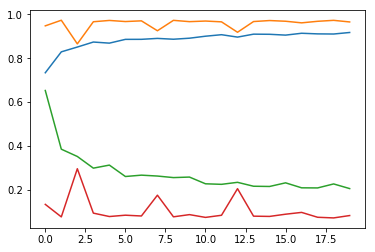

In [61]:
plt.plot(history_.history['acc'])
plt.plot(history_.history['val_acc'])
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])

In [ ]:
# model.load_weights(top_weights_path)

In [62]:
print("\nStarting to Fine Tune Model\n")


Starting to Fine Tune Model



In [63]:
# based_model_last_block_layer_number points to the layer in your model you want to train.
# For example if you want to train the last block of a 19 layer VGG16 model this should be 15
# If you want to train the last TWO blocks of an Inception model it should be 172
# layers before this number will used the pre-trained weights, layers above and including this number
# will be re-trained based on the new data.
for layer in model.layers[:based_model_last_block_layer_number]:
    layer.trainable = False
for layer in model.layers[based_model_last_block_layer_number:]:
    layer.trainable = True

In [64]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=learn_rate, momentum=momentum),
              metrics=['accuracy'])

In [66]:
final_weights_path = 'model/model_weights.h5'

checkpoint = ModelCheckpoint(final_weights_path, monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

history_ = model.fit_generator(train_generator, 
                               epochs=20,
                               steps_per_epoch=50,
                               validation_data=validation_generator,
                               validation_steps=35,
                               callbacks=callbacks_list)

Epoch 1/20
50/50 [==============================] - 46s - loss: 0.1719 - acc: 0.9319 - val_loss: 0.0798 - val_acc: 0.9667
Epoch 2/20
50/50 [==============================] - 38s - loss: 0.1770 - acc: 0.9284 - val_loss: 0.0741 - val_acc: 0.9703
Epoch 3/20
50/50 [==============================] - 38s - loss: 0.1819 - acc: 0.9231 - val_loss: 0.0716 - val_acc: 0.9706
Epoch 4/20
50/50 [==============================] - 38s - loss: 0.1634 - acc: 0.9363 - val_loss: 0.0659 - val_acc: 0.9735
Epoch 5/20
50/50 [==============================] - 37s - loss: 0.1607 - acc: 0.9319 - val_loss: 0.0755 - val_acc: 0.9731
Epoch 6/20
50/50 [==============================] - 37s - loss: 0.1666 - acc: 0.9285 - val_loss: 0.0748 - val_acc: 0.9708
Epoch 7/20
50/50 [==============================] - 39s - loss: 0.1595 - acc: 0.9372 - val_loss: 0.0553 - val_acc: 0.9790
Epoch 8/20
50/50 [==============================] - 37s - loss: 0.1562 - acc: 0.9356 - val_loss: 0.0693 - val_acc: 0.9739
Epoch 9/20
50/50 [======

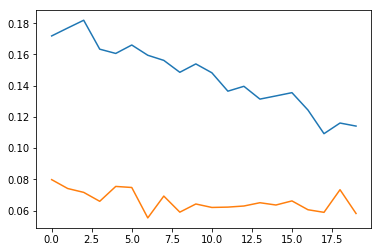

In [71]:
plt.plot(history_.history["loss"])
plt.plot(history_.history["val_loss"])

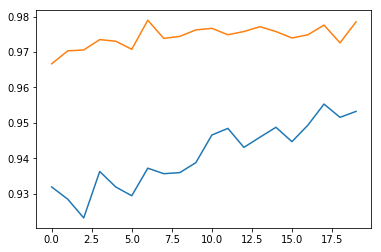

In [72]:
plt.plot(history_.history["acc"])
plt.plot(history_.history["val_acc"])

In [73]:
model.evaluate_generator(test_generator, steps=50)

[0.053177014466015818, 0.97842639593908631]

In [74]:
model.evaluate_generator(test_generator, steps=150)

[0.052793156358007437, 0.98055555555555551]

In [111]:
test_generator = test_datagen.flow_from_directory(test_data_dir, 
                                                  shuffle=False,
                                                  target_size=(img_height, img_width),
                                                  batch_size=200,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.


In [113]:
log_losses = []
accuracies = []

for i in range(10):
    test_batch = next(test_generator)
    y_pred = model.predict(test_batch[0], verbose=True)
#     log_losses.append(log_loss(test_batch[1], y_pred))
    accuracies.append(accuracy_score(test_batch[1], y_pred > 0.5))

200/200 [==============================] - 1s     


In [114]:
np.mean(accuracies)

0.97999999999999987

yay we have 0.97999 in terms of accuracy score